## Housing Credit Risk Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/rbnsn/OneDrive/Documents/capstone project/loan_data.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
df.shape

(307511, 122)

In [4]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [5]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

    Total Missing Values In The Dataset

In [6]:
df.drop_duplicates()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [7]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Length: 307511, dtype: bool

In [8]:
df.isna().sum().sum() 

9152465

In [9]:
df.isna().sum().head(60)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [10]:
df.isna().sum().tail(60)

COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE                  208642
LANDAREA_MODE                   182590
LIVINGAPARTMENTS_MODE           210199
LIVINGAREA_MODE                 154350
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAREA_MODE              169682
APARTMENTS_MEDI                 156061
BASEMENTAREA_MEDI               179943
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BUILD_MEDI                204488
COMMONAREA_MEDI                 214865
ELEVATORS_MEDI                  163891
ENTRANCES_MEDI                  154828
FLOORSMAX_MEDI                  153020
FLOORSMIN_MEDI                  208642
LANDAREA_MEDI                   182590
LIVINGAPARTMENTS_MEDI           210199
LIVINGAREA_MEDI                 154350
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAREA_MEDI              169682
FONDKAPREMONT_MODE              210295
HOUSETYPE_MODE           

In [11]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

# Percentage Of Missing Values Of Each Column

In [12]:
round(df.isnull().sum() / df.shape[0] * 100.00,5).head(60)

SK_ID_CURR                      0.00000
TARGET                          0.00000
NAME_CONTRACT_TYPE              0.00000
CODE_GENDER                     0.00000
FLAG_OWN_CAR                    0.00000
FLAG_OWN_REALTY                 0.00000
CNT_CHILDREN                    0.00000
AMT_INCOME_TOTAL                0.00000
AMT_CREDIT                      0.00000
AMT_ANNUITY                     0.00390
AMT_GOODS_PRICE                 0.09040
NAME_TYPE_SUITE                 0.42015
NAME_INCOME_TYPE                0.00000
NAME_EDUCATION_TYPE             0.00000
NAME_FAMILY_STATUS              0.00000
NAME_HOUSING_TYPE               0.00000
REGION_POPULATION_RELATIVE      0.00000
DAYS_BIRTH                      0.00000
DAYS_EMPLOYED                   0.00000
DAYS_REGISTRATION               0.00000
DAYS_ID_PUBLISH                 0.00000
OWN_CAR_AGE                    65.99081
FLAG_MOBIL                      0.00000
FLAG_EMP_PHONE                  0.00000
FLAG_WORK_PHONE                 0.00000


In [13]:
round(df.isnull().sum() / df.shape[0] * 100.00,5).tail(60)

COMMONAREA_MODE                 69.87230
ELEVATORS_MODE                  53.29598
ENTRANCES_MODE                  50.34877
FLOORSMAX_MODE                  49.76082
FLOORSMIN_MODE                  67.84863
LANDAREA_MODE                   59.37674
LIVINGAPARTMENTS_MODE           68.35495
LIVINGAREA_MODE                 50.19333
NONLIVINGAPARTMENTS_MODE        69.43296
NONLIVINGAREA_MODE              55.17916
APARTMENTS_MEDI                 50.74973
BASEMENTAREA_MEDI               58.51596
YEARS_BEGINEXPLUATATION_MEDI    48.78102
YEARS_BUILD_MEDI                66.49778
COMMONAREA_MEDI                 69.87230
ELEVATORS_MEDI                  53.29598
ENTRANCES_MEDI                  50.34877
FLOORSMAX_MEDI                  49.76082
FLOORSMIN_MEDI                  67.84863
LANDAREA_MEDI                   59.37674
LIVINGAPARTMENTS_MEDI           68.35495
LIVINGAREA_MEDI                 50.19333
NONLIVINGAPARTMENTS_MEDI        69.43296
NONLIVINGAREA_MEDI              55.17916
FONDKAPREMONT_MO

In [14]:
missing_percentages = df.isnull().sum() / len(df) * 100
missing_percentages


SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [15]:
import pandas as pd

# Assuming missing_percentages is calculated as mentioned earlier
missing_percentages_df = pd.DataFrame({'Column_Name': missing_percentages.index, 'Missing_Percentage': missing_percentages.values})
missing_percentages_df.head(60)

Column_Name  Missing_Percentage
0                    SK_ID_CURR            0.000000
1                        TARGET            0.000000
2            NAME_CONTRACT_TYPE            0.000000
3                   CODE_GENDER            0.000000
4                  FLAG_OWN_CAR            0.000000
5               FLAG_OWN_REALTY            0.000000
6                  CNT_CHILDREN            0.000000
7              AMT_INCOME_TOTAL            0.000000
8                    AMT_CREDIT            0.000000
9                   AMT_ANNUITY            0.003902
10              AMT_GOODS_PRICE            0.090403
11              NAME_TYPE_SUITE            0.420148
12             NAME_INCOME_TYPE            0.000000
13          NAME_EDUCATION_TYPE            0.000000
14           NAME_FAMILY_STATUS            0.000000
15            NAME_HOUSING_TYPE            0.000000
16   REGION_POPULATION_RELATIVE            0.000000
17                   DAYS_BIRTH            0.000000
18                DAYS_EMPLOYED            0.000000
19            DAYS_REGISTRATION            0.000000
20              DAYS_ID_PUBLISH            0.000000
21                  OWN_CAR_AGE           65.990810
22                   FLAG_MOBIL            0.000000
23               FLAG_EMP_PHONE            0.000000
24              FLAG_WORK_PHONE            0.000000
25             FLAG_CONT_MOBILE            0.000000
26                   FLAG_PHONE            0.000000
27                   FLAG_EMAIL            0.000000
28              OCCUPATION_TYPE           31.345545
29              CNT_FAM_MEMBERS            0.000650
30         REGION_RATING_CLIENT            0.000000
31  REGION_RATING_CLIENT_W_CITY            0.000000
32   WEEKDAY_APPR_PROCESS_START            0.000000
33      HOUR_APPR_PROCESS_START            0.000000
34   REG_REGION_NOT_LIVE_REGION            0.000000
35   REG_REGION_NOT_WORK_REGION            0.000000
36  LIVE_REGION_NOT_WORK_REGION            0.000000
37       REG_CITY_NOT_LIVE_CITY            0.000000
38       REG_CITY_NOT_WORK_CITY            0.000000
39      LIVE_CITY_NOT_WORK_CITY            0.000000
40            ORGANIZATION_TYPE            0.000000
41                 EXT_SOURCE_1           56.381073
42                 EXT_SOURCE_2            0.214626
43                 EXT_SOURCE_3           19.825307
44               APARTMENTS_AVG           50.749729
45             BASEMENTAREA_AVG           58.515956
46  YEARS_BEGINEXPLUATATION_AVG           48.781019
47              YEARS_BUILD_AVG           66.497784
48               COMMONAREA_AVG           69.872297
49                ELEVATORS_AVG           53.295980
50                ENTRANCES_AVG           50.348768
51                FLOORSMAX_AVG           49.760822
52                FLOORSMIN_AVG           67.848630
53                 LANDAREA_AVG           59.376738
54         LIVINGAPARTMENTS_AVG           68.354953
55               LIVINGAREA_AVG           50.193326
56      NONLIVINGAPARTMENTS_AVG           69.432963
57            NONLIVINGAREA_AVG           55.179164
58              APARTMENTS_MODE           50.749729
59            BASEMENTAREA_MODE           58.515956

In [16]:
missing_percentages_df.tail(60)

Column_Name  Missing_Percentage
62                COMMONAREA_MODE           69.872297
63                 ELEVATORS_MODE           53.295980
64                 ENTRANCES_MODE           50.348768
65                 FLOORSMAX_MODE           49.760822
66                 FLOORSMIN_MODE           67.848630
67                  LANDAREA_MODE           59.376738
68          LIVINGAPARTMENTS_MODE           68.354953
69                LIVINGAREA_MODE           50.193326
70       NONLIVINGAPARTMENTS_MODE           69.432963
71             NONLIVINGAREA_MODE           55.179164
72                APARTMENTS_MEDI           50.749729
73              BASEMENTAREA_MEDI           58.515956
74   YEARS_BEGINEXPLUATATION_MEDI           48.781019
75               YEARS_BUILD_MEDI           66.497784
76                COMMONAREA_MEDI           69.872297
77                 ELEVATORS_MEDI           53.295980
78                 ENTRANCES_MEDI           50.348768
79                 FLOORSMAX_MEDI           49.760822
80                 FLOORSMIN_MEDI           67.848630
81                  LANDAREA_MEDI           59.376738
82          LIVINGAPARTMENTS_MEDI           68.354953
83                LIVINGAREA_MEDI           50.193326
84       NONLIVINGAPARTMENTS_MEDI           69.432963
85             NONLIVINGAREA_MEDI           55.179164
86             FONDKAPREMONT_MODE           68.386172
87                 HOUSETYPE_MODE           50.176091
88                 TOTALAREA_MODE           48.268517
89             WALLSMATERIAL_MODE           50.840783
90            EMERGENCYSTATE_MODE           47.398304
91       OBS_30_CNT_SOCIAL_CIRCLE            0.332021
92       DEF_30_CNT_SOCIAL_CIRCLE            0.332021
93       OBS_60_CNT_SOCIAL_CIRCLE            0.332021
94       DEF_60_CNT_SOCIAL_CIRCLE            0.332021
95         DAYS_LAST_PHONE_CHANGE            0.000325
96                FLAG_DOCUMENT_2            0.000000
97                FLAG_DOCUMENT_3            0.000000
98                FLAG_DOCUMENT_4            0.000000
99                FLAG_DOCUMENT_5            0.000000
100               FLAG_DOCUMENT_6            0.000000
101               FLAG_DOCUMENT_7            0.000000
102               FLAG_DOCUMENT_8            0.000000
103               FLAG_DOCUMENT_9            0.000000
104              FLAG_DOCUMENT_10            0.000000
105              FLAG_DOCUMENT_11            0.000000
106              FLAG_DOCUMENT_12            0.000000
107              FLAG_DOCUMENT_13            0.000000
108              FLAG_DOCUMENT_14            0.000000
109              FLAG_DOCUMENT_15            0.000000
110              FLAG_DOCUMENT_16            0.000000
111              FLAG_DOCUMENT_17            0.000000
112              FLAG_DOCUMENT_18            0.000000
113              FLAG_DOCUMENT_19            0.000000
114              FLAG_DOCUMENT_20            0.000000
115              FLAG_DOCUMENT_21            0.000000
116    AMT_REQ_CREDIT_BUREAU_HOUR           13.501631
117     AMT_REQ_CREDIT_BUREAU_DAY           13.501631
118    AMT_REQ_CREDIT_BUREAU_WEEK           13.501631
119     AMT_REQ_CREDIT_BUREAU_MON           13.501631
120     AMT_REQ_CREDIT_BUREAU_QRT           13.501631
121    AMT_REQ_CREDIT_BUREAU_YEAR           13.501631

# Removal of Missing Values Which is Greater Than 40%

In [17]:
# Dropping the columns with >40% null values
df = df.loc[:,df.isnull().sum()/len(df)*100 < 40]
df.shape

(307511, 73)

    We had 122 columns now totally we have only 73 columns afer dropping the NaN values.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

    Missing Values of 73 Columns

In [19]:
round(df.isnull().sum() / df.shape[0] * 100.00,5).head(60)

SK_ID_CURR                      0.00000
TARGET                          0.00000
NAME_CONTRACT_TYPE              0.00000
CODE_GENDER                     0.00000
FLAG_OWN_CAR                    0.00000
FLAG_OWN_REALTY                 0.00000
CNT_CHILDREN                    0.00000
AMT_INCOME_TOTAL                0.00000
AMT_CREDIT                      0.00000
AMT_ANNUITY                     0.00390
AMT_GOODS_PRICE                 0.09040
NAME_TYPE_SUITE                 0.42015
NAME_INCOME_TYPE                0.00000
NAME_EDUCATION_TYPE             0.00000
NAME_FAMILY_STATUS              0.00000
NAME_HOUSING_TYPE               0.00000
REGION_POPULATION_RELATIVE      0.00000
DAYS_BIRTH                      0.00000
DAYS_EMPLOYED                   0.00000
DAYS_REGISTRATION               0.00000
DAYS_ID_PUBLISH                 0.00000
FLAG_MOBIL                      0.00000
FLAG_EMP_PHONE                  0.00000
FLAG_WORK_PHONE                 0.00000
FLAG_CONT_MOBILE                0.00000


In [20]:
round(df.isnull().sum() / df.shape[0] * 100.00,5).tail(13)

FLAG_DOCUMENT_15               0.00000
FLAG_DOCUMENT_16               0.00000
FLAG_DOCUMENT_17               0.00000
FLAG_DOCUMENT_18               0.00000
FLAG_DOCUMENT_19               0.00000
FLAG_DOCUMENT_20               0.00000
FLAG_DOCUMENT_21               0.00000
AMT_REQ_CREDIT_BUREAU_HOUR    13.50163
AMT_REQ_CREDIT_BUREAU_DAY     13.50163
AMT_REQ_CREDIT_BUREAU_WEEK    13.50163
AMT_REQ_CREDIT_BUREAU_MON     13.50163
AMT_REQ_CREDIT_BUREAU_QRT     13.50163
AMT_REQ_CREDIT_BUREAU_YEAR    13.50163
dtype: float64

# Imputation of Missing Values

In [21]:
df['CODE_GENDER'].replace('XNA', np.nan, inplace=True)
df['ORGANIZATION_TYPE'].replace('XNA', np.nan, inplace=True)

In [22]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median(), inplace=True)
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(), inplace=True)
df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace=True)
df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0], inplace=True)
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].median(), inplace=True)
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].median(), inplace=True)
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].median(), inplace=True)
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df['AMT_REQ_CREDIT_BUREAU_HOUR'].median(), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df['AMT_REQ_CREDIT_BUREAU_DAY'].median(), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df['AMT_REQ_CREDIT_BUREAU_MON'].median(), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df['AMT_REQ_CREDIT_BUREAU_QRT'].median(), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df['AMT_REQ_CREDIT_BUREAU_WEEK'].median(), inplace=True)
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace=True)
df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)
#XNA
df['CODE_GENDER'].fillna(df['CODE_GENDER'].mode()[0], inplace=True)
df['ORGANIZATION_TYPE'].fillna(df['ORGANIZATION_TYPE'].mode()[0], inplace=True)

    We had imputed the missing values with median and mode. So now we have no missing values..

In [23]:
df.isna().sum().sum()

0

# Data Types of Each Variable

In [24]:
df.dtypes.head(60)

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [25]:
df.dtypes.tail(13)

FLAG_DOCUMENT_15                int64
FLAG_DOCUMENT_16                int64
FLAG_DOCUMENT_17                int64
FLAG_DOCUMENT_18                int64
FLAG_DOCUMENT_19                int64
FLAG_DOCUMENT_20                int64
FLAG_DOCUMENT_21                int64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

    Datatype Conversion

In [26]:
cols_with_flag = df.columns[df.columns.str.startswith('FLAG')]

In [27]:
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype(dtype=int)

In [28]:
for i in cols_with_flag:
    df[i] = df[i].astype('category')

# Analyzing The Columns

In [29]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [30]:
cols_with_flag

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [31]:
object_cols = df.select_dtypes(include=['category', 'object'])
object_cols.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

# CHI SQUARE TEST FOR CATEGORICAL FEATURES

In [32]:
cols_with_flag

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [33]:
from scipy.stats import chi2_contingency
for i in object_cols:
    contingency_table = pd.crosstab(df[i], df['TARGET'])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi2 Statistics for {i}: {chi2_stat}")
    print(f"P-value for {i}: {p_val}")
    print("*******************************")

Chi2 Statistics for NAME_CONTRACT_TYPE: 293.15054219964554
P-value for NAME_CONTRACT_TYPE: 1.0235150721172847e-65
*******************************
Chi2 Statistics for CODE_GENDER: 920.1038473528081
P-value for CODE_GENDER: 4.183493188620687e-202
*******************************
Chi2 Statistics for FLAG_OWN_CAR: 146.65601825576024
P-value for FLAG_OWN_CAR: 9.330994431109667e-34
*******************************
Chi2 Statistics for FLAG_OWN_REALTY: 11.57582729808418
P-value for FLAG_OWN_REALTY: 0.0006681470317545887
*******************************
Chi2 Statistics for NAME_TYPE_SUITE: 31.947946557874488
P-value for NAME_TYPE_SUITE: 1.669680344640335e-05
*******************************
Chi2 Statistics for NAME_INCOME_TYPE: 1253.4708080924986
P-value for NAME_INCOME_TYPE: 1.9281456056861122e-266
*******************************
Chi2 Statistics for NAME_EDUCATION_TYPE: 1019.2131873088356
P-value for NAME_EDUCATION_TYPE: 2.4476812052198174e-219
*******************************
Chi2 Statistics for N

Hypothesis:

Null Hypothesis (H0): There is no association between the categorical variable and the 'TARGET' variable.

Alternative Hypothesis (H1): There is an association between the categorical variable and the 'TARGET' variable.



### After performing chi2 test we infer that these columns have a significant relationship with target variable

    'FLAG_OWN_CAR'  
    'FLAG_OWN_REALTY'
    'FLAG_EMP_PHONE'
    'FLAG_WORK_PHONE' 
    'FLAG_PHONE'

### Hence, We are removing the remaining columns

In [34]:
df.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_EMAIL'], axis=1, inplace=True)

<Axes: >

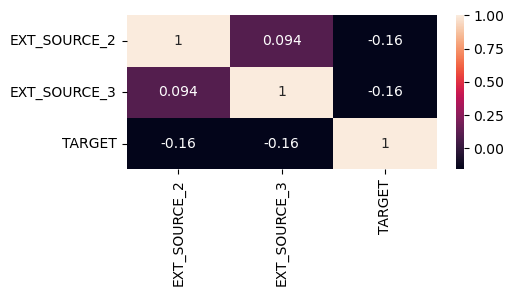

In [35]:
plt.figure(figsize=(5,2))
sns.heatmap(data=df[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(), annot=True)

### The above columns are having less correlation with the target. They are insignificant. So we are neglecting the above columns

In [36]:
df.drop(['EXT_SOURCE_2','EXT_SOURCE_3'], axis=1, inplace=True)

In [37]:
df.shape

(307511, 48)

# Data Visualizations 

## UNIVARIATE ANALYSIS

### Checking if there are any outliers

In [38]:
cols = list(df.select_dtypes(include=np.number).columns)
len(cols)

33

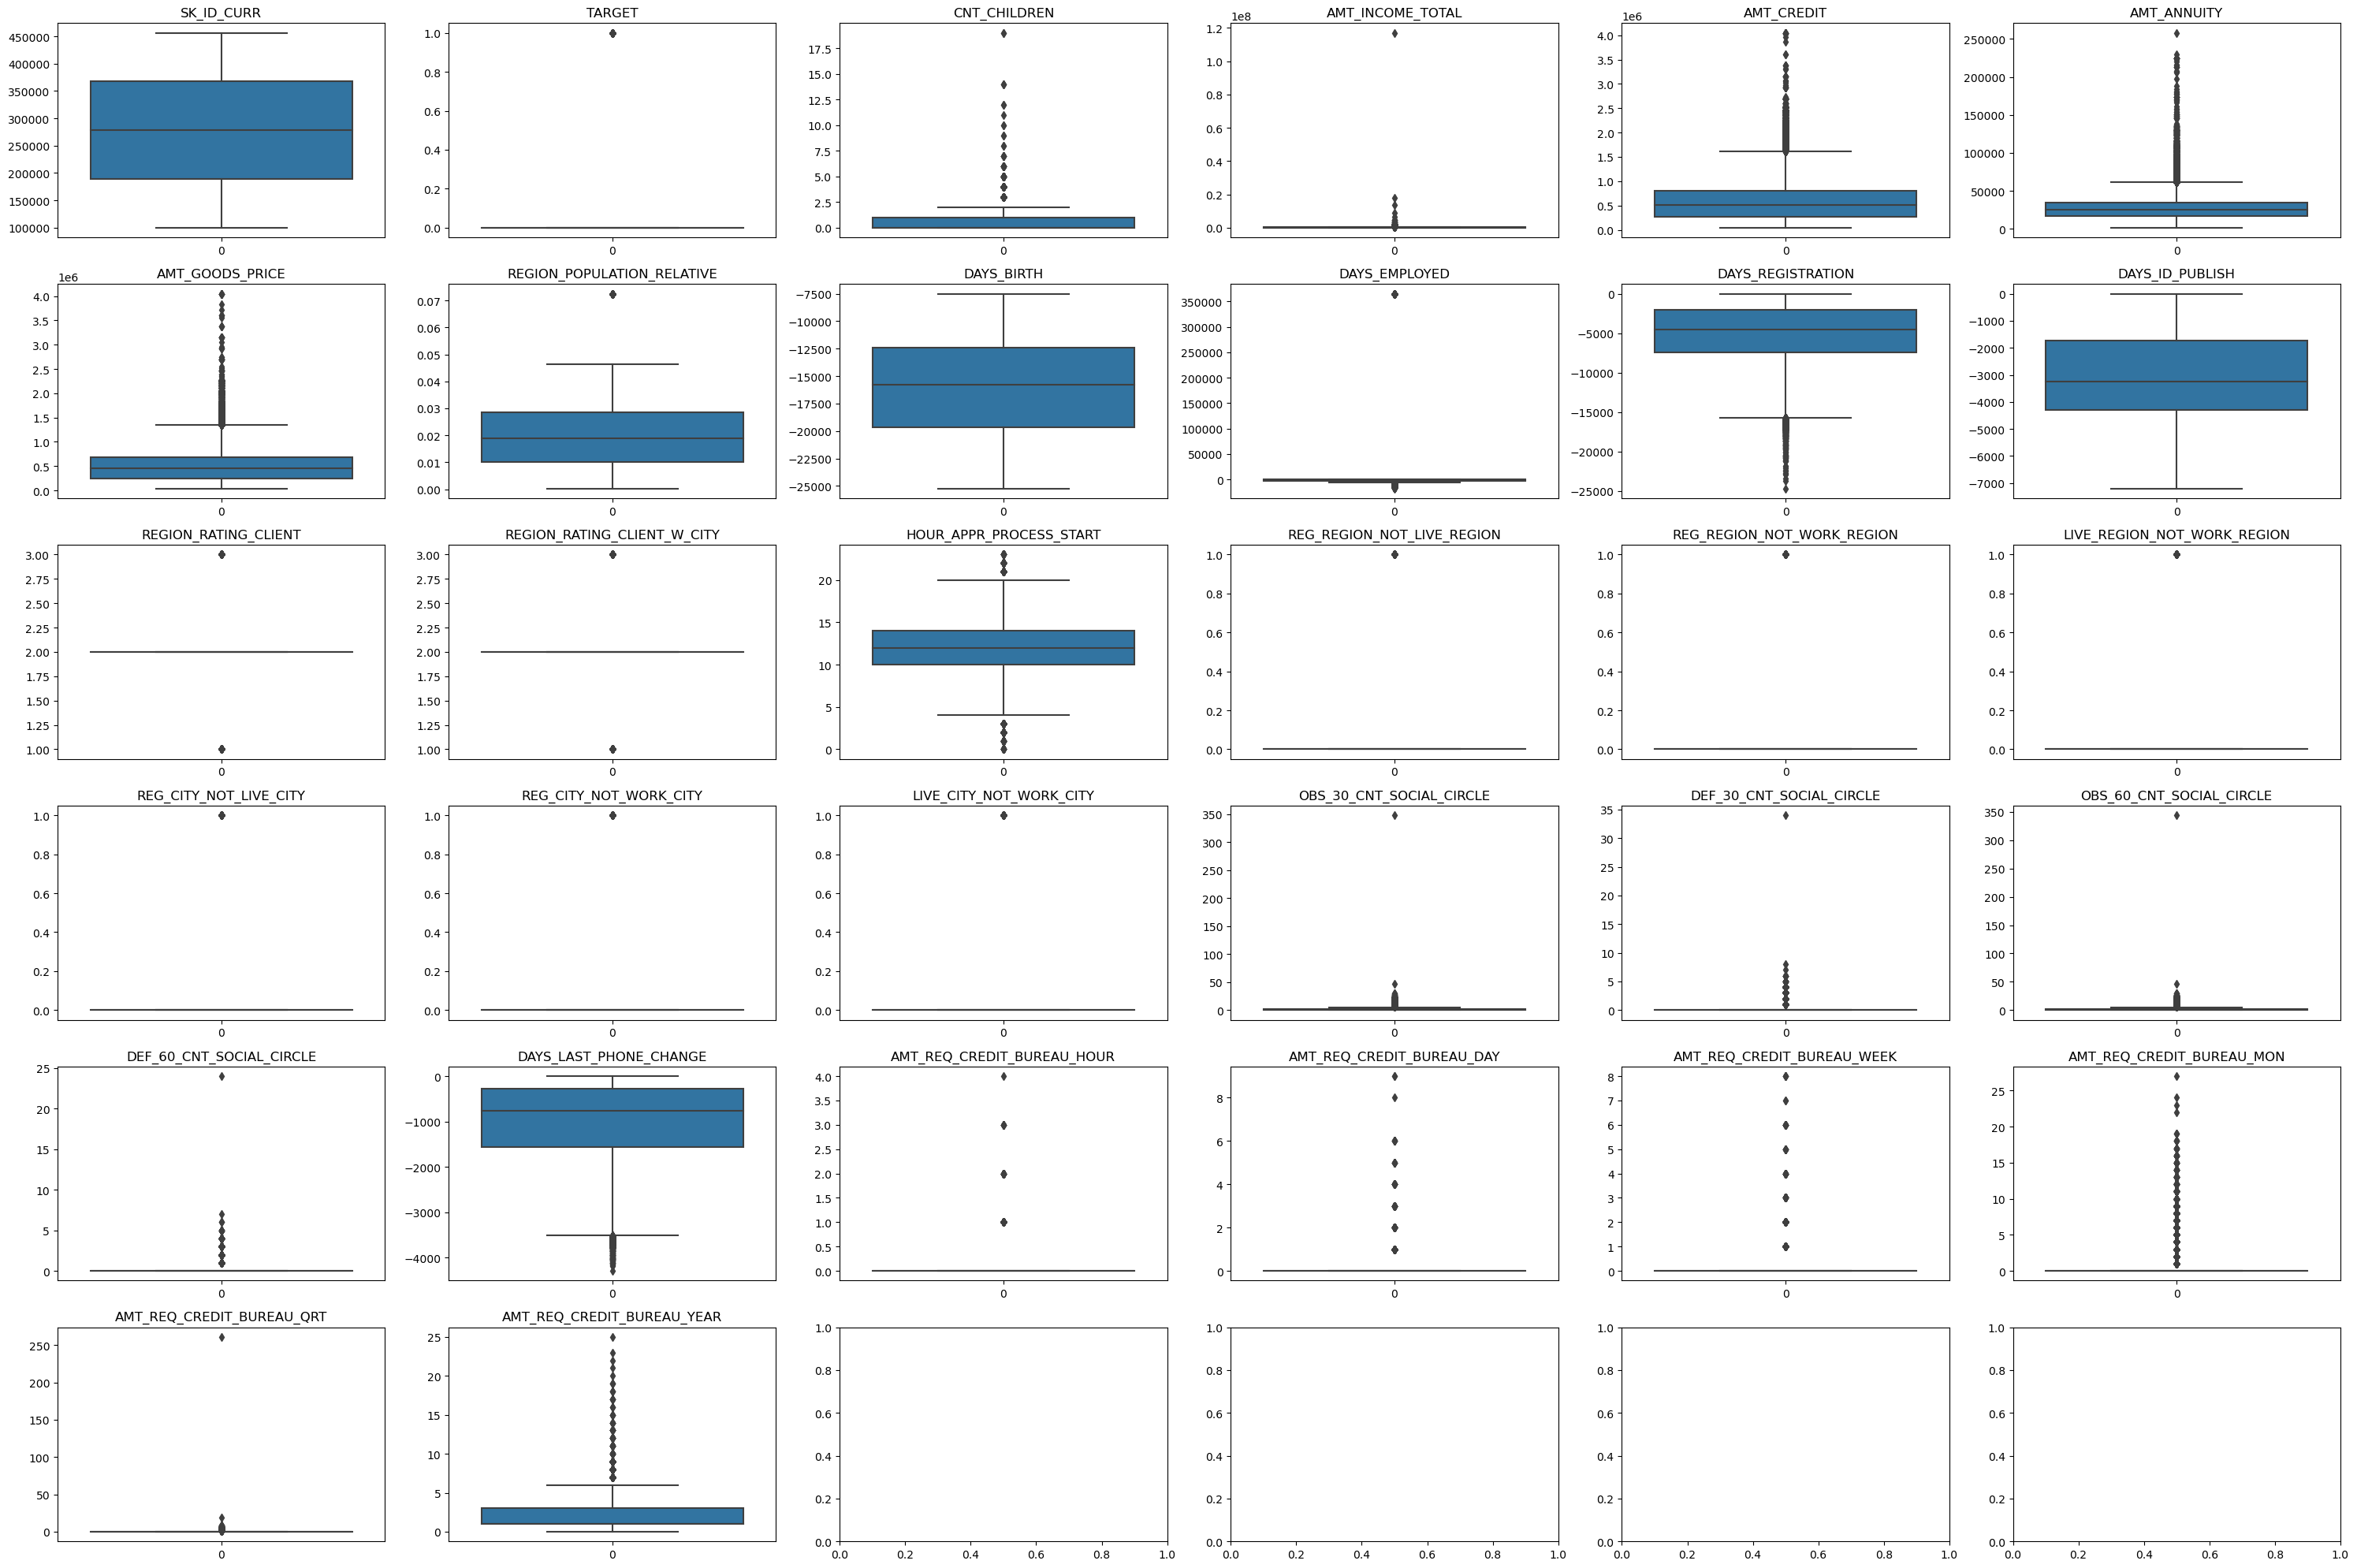

In [39]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

fig, ax = plt.subplots(6, 6, figsize=(30, 20))

for i, subplot in zip(numeric_columns, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    subplot.set_title(i)

plt.tight_layout()
plt.show()

    Almost all the variables have outliers and they have to be treated 

### Checking if there are any skewness

In [40]:
df_num = df.select_dtypes(include=np.number)
#df_num.head()

In [41]:
cols1 = df_num

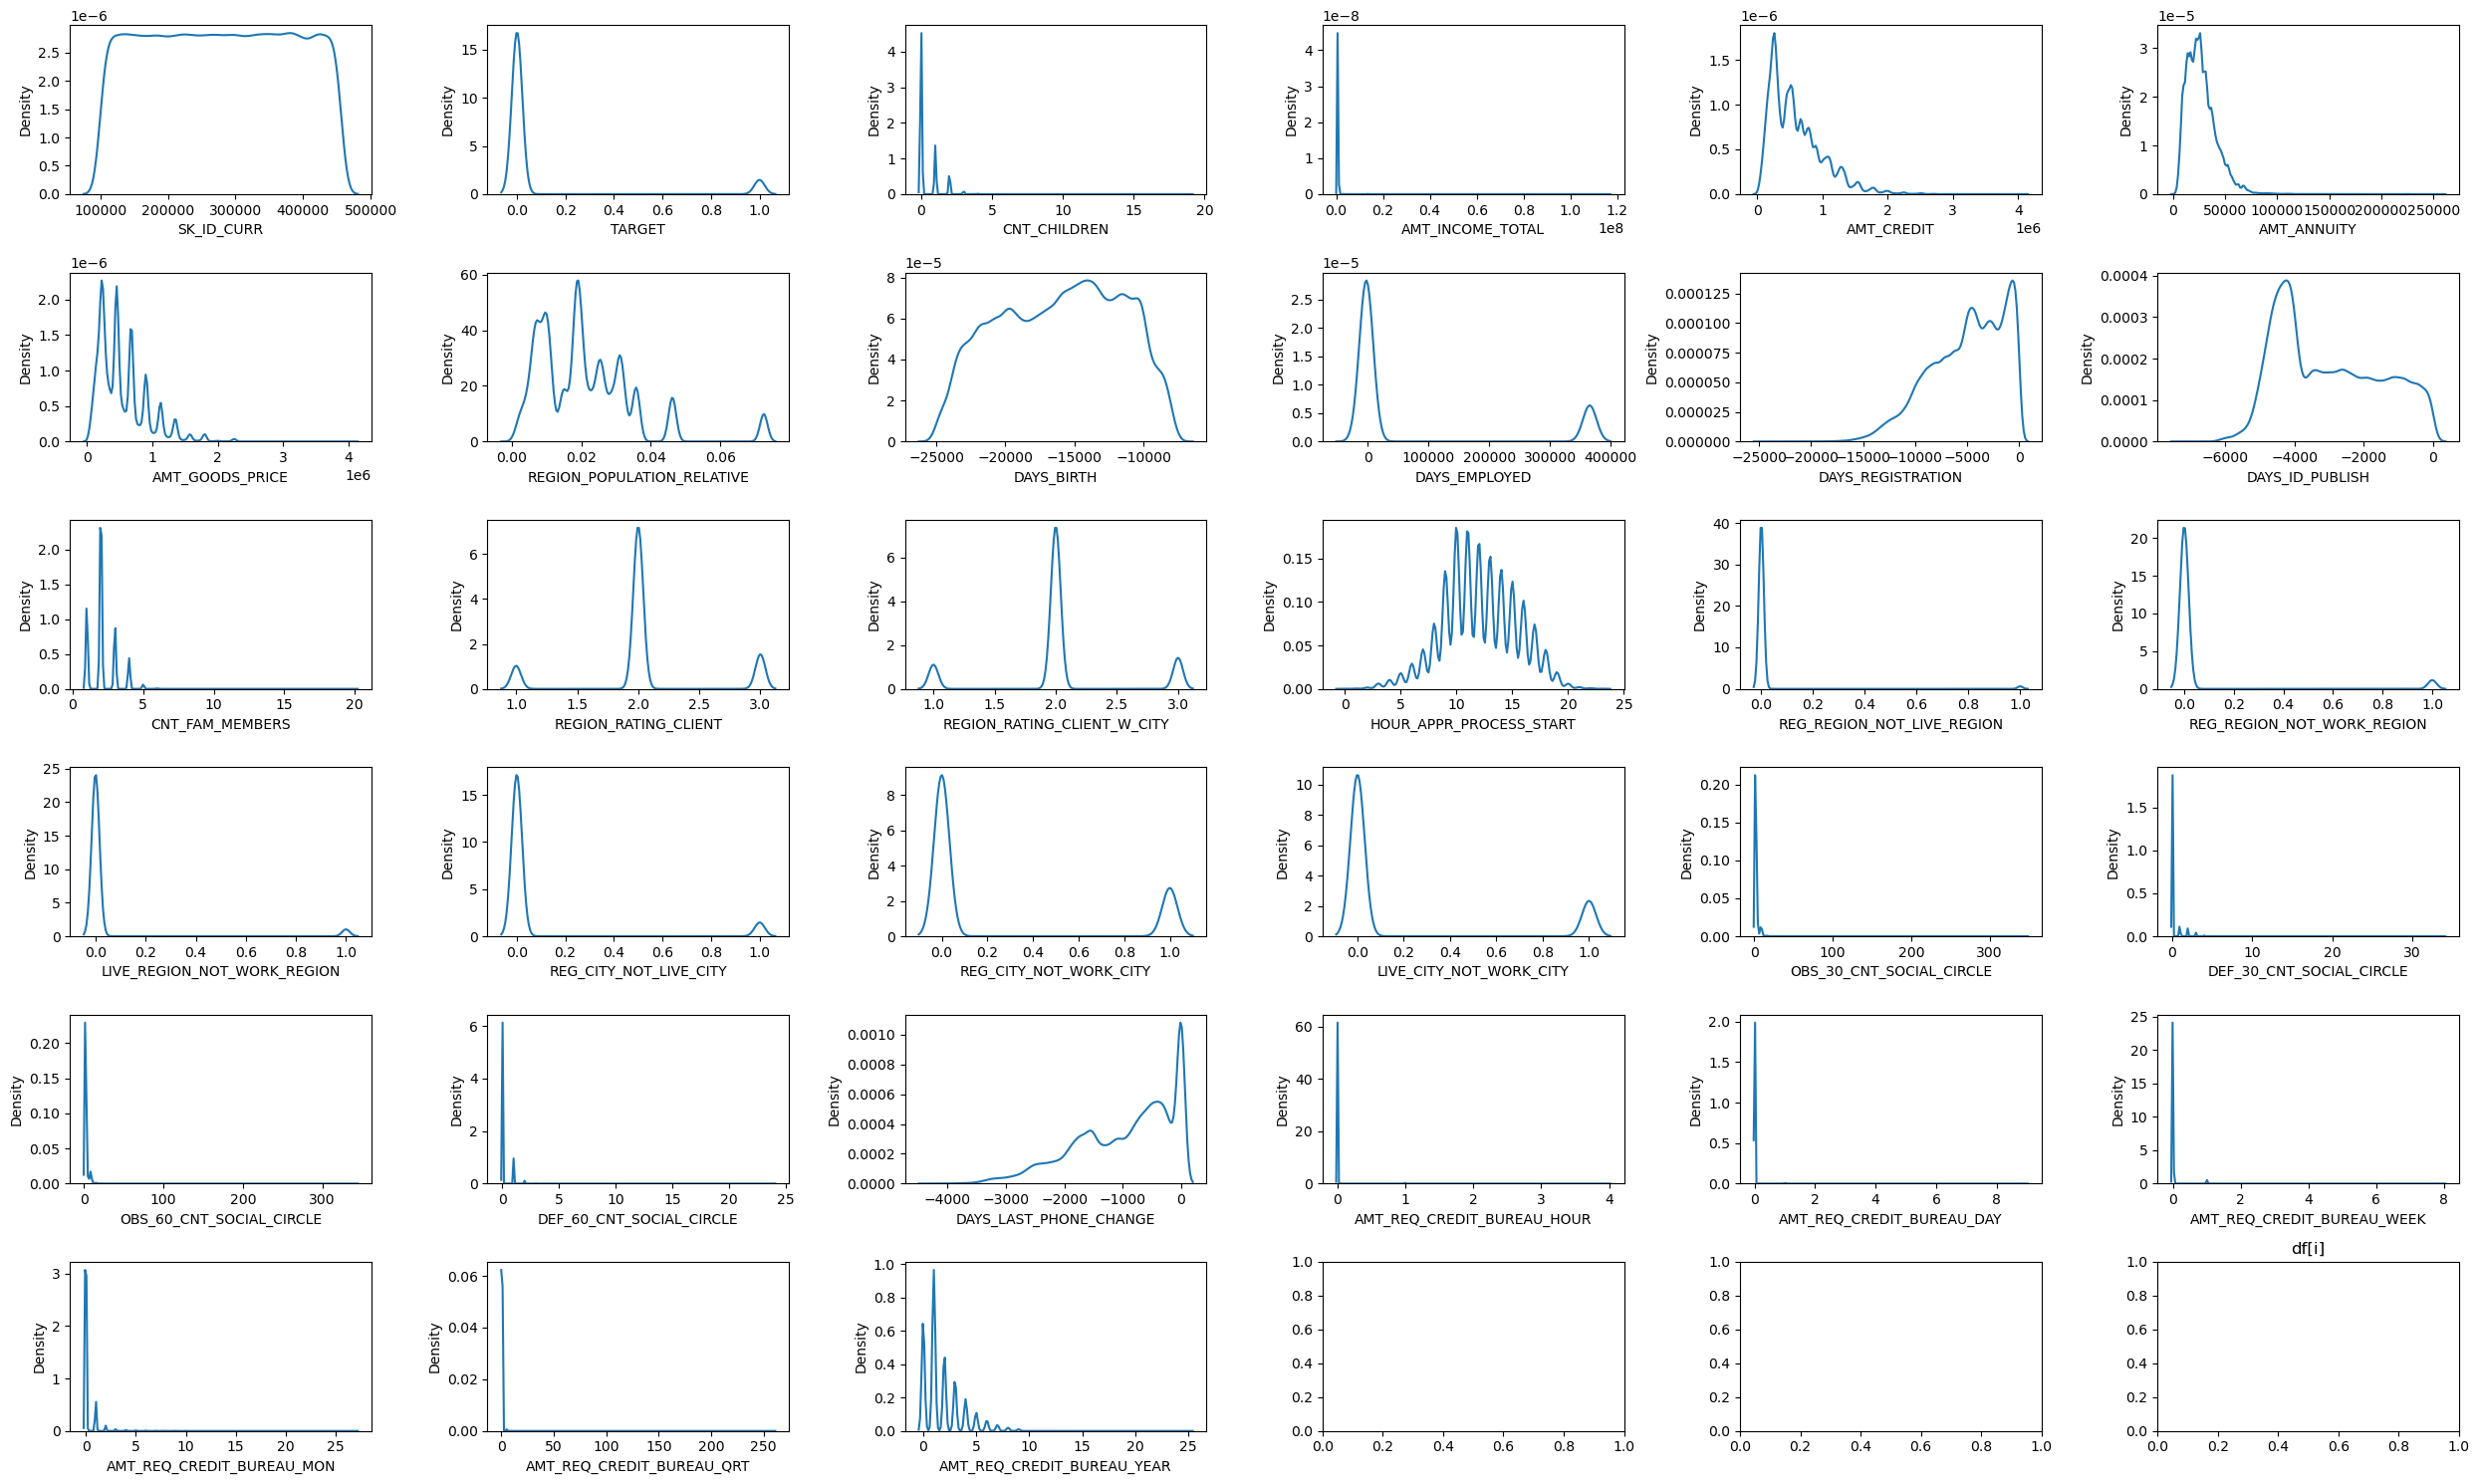

In [42]:
fig, ax= plt.subplots(6,6, figsize=(25,15))

for i, subplot in zip(cols1, ax.flatten()):
    sns.kdeplot(df_num[i], ax=subplot)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

## BIVARIATE ANALYSIS

In [102]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Text(0.5, 1.0, 'Distribution of TARGET Variable')

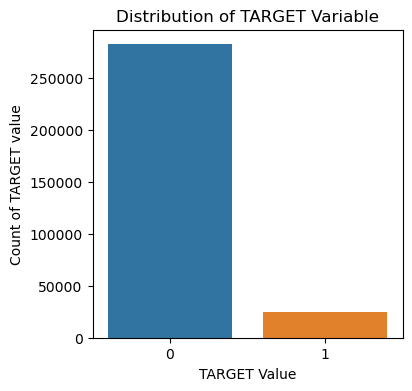

In [43]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x=df['TARGET'])
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET value")
plt.title("Distribution of TARGET Variable")

#### Scatter plot for two numerical variables

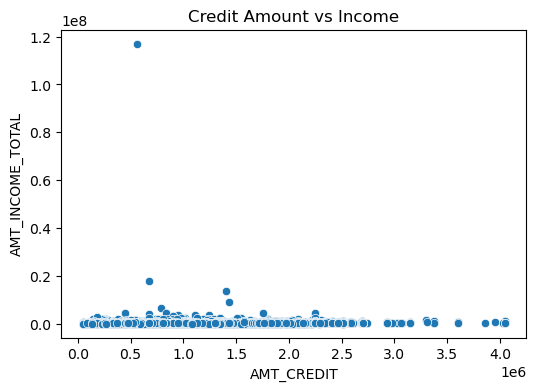

In [44]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='AMT_CREDIT', y='AMT_INCOME_TOTAL', data=df)
plt.title('Credit Amount vs Income')
plt.show()

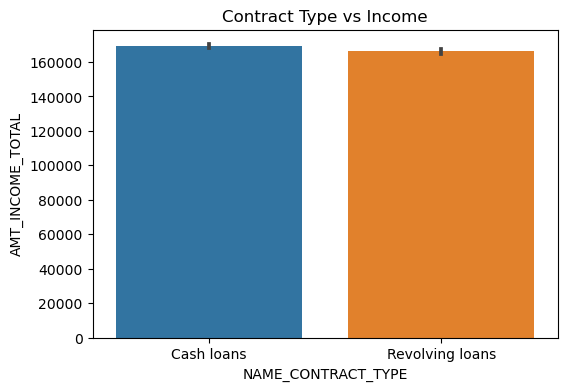

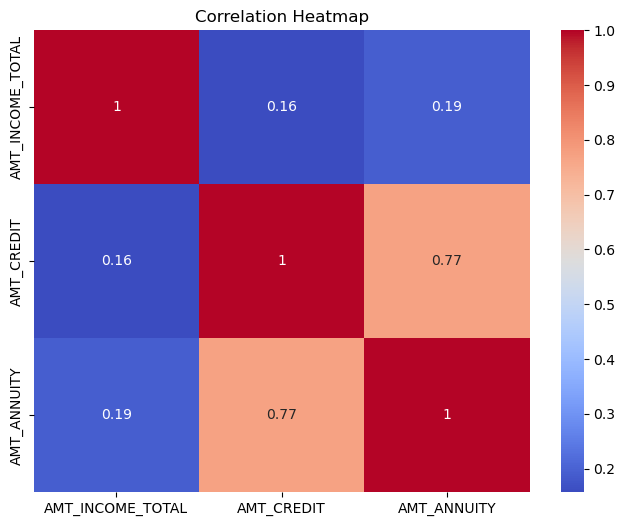

In [45]:
# Bar plot between categorical and numerical variables
plt.figure(figsize=(6, 4))
sns.barplot(x='NAME_CONTRACT_TYPE', y='AMT_INCOME_TOTAL', data=df)
plt.title('Contract Type vs Income')
plt.show()

# Heatmap for correlation among numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### Numerical variable (AMT_INCOME_TOTAL) vs Categorical variable (CODE_GENDER)

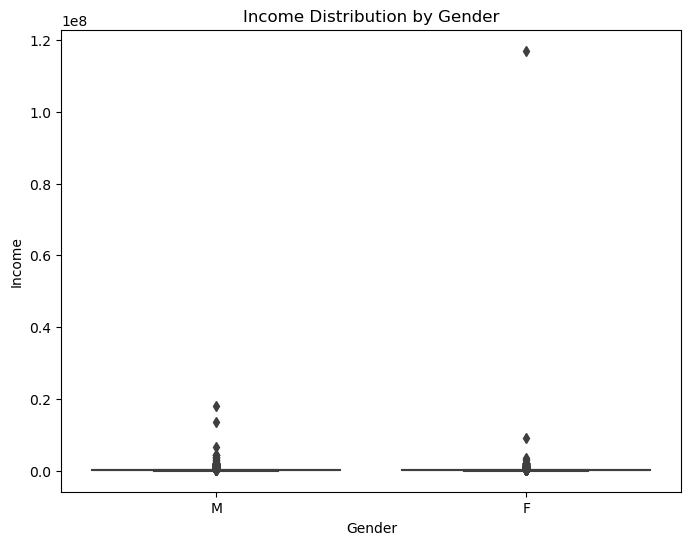

In [46]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=df)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

In [47]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [48]:
# creating new datadrame for target=0
df_target0 = df[df['TARGET']==0]
df_target0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   ...  DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
1  ...                       0.0                      1.0   
2  ...                       0.0                      0.0   
3  ...                       0.0                      2.0   
4  ...                       0.0                      0.0   
5  ...                       0.0                      0.0   

  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
1                      0.0                 -828.0                        0.0   
2                      0.0                 -815.0                        0.0   
3                      0.0                 -617.0                        0.0   
4                      0.0                -1106.0                        0.0   
5                      0.0                -2536.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   
5                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   
5                        0.0                        1.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
1                         0.0  
2                         0.0  
3                         1.0  
4                         0.0  
5                         1.0  

[5 rows x 48 columns]

In [49]:
# creating new datadrame for target=1
df_target1 = df[df['TARGET']==1]
df_target1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    ...  DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0   ...                       2.0                      2.0   
26  ...                       1.0                     10.0   
40  ...                       0.0                      0.0   
42  ...                       0.0                      1.0   
81  ...                       1.0                      1.0   

   DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
0                       2.0                -1134.0                        0.0   
26                      0.0                 -161.0                        0.0   
40                      0.0                -1075.0                        0.0   
42                      0.0                -1480.0                        0.0   
81                      1.0                    0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
26                       0.0                         0.0   
40                       0.0                         0.0   
42                       0.0                         0.0   
81                       0.0                         0.0   

    AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                         0.0                        0.0   
26                        0.0                        2.0   
40                        2.0                        0.0   
42                        0.0                        0.0   
81                        0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_YEAR  
0                          1.0  
26                         2.0  
40                         4.0  
42                         2.0  
81                         0.0  

[5 rows x 48 columns]

In [50]:
ratio = df_target0.shape[0]/df_target1.shape[0]
ratio

11.387150050352467

#### So basically the ratio of 0:1 is 11.387:1 This indiactes that for every 1 there are almost 11 number of 0's. this is a higlhy imbalanced data set¶

In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

<Axes: ylabel='TARGET'>

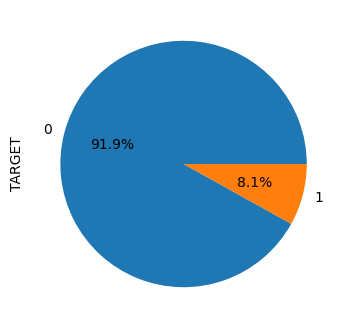

In [52]:
plt.figure(figsize=(4,4))
df.TARGET.value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='NAME_CONTRACT_TYPE'>

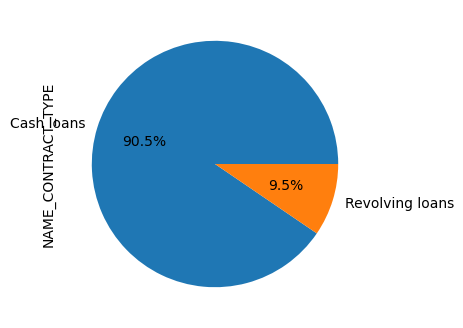

In [53]:
plt.figure(figsize=(4,4))
df.NAME_CONTRACT_TYPE.value_counts().plot(kind='pie',autopct="%1.1f%%") 

<Axes: ylabel='CODE_GENDER'>

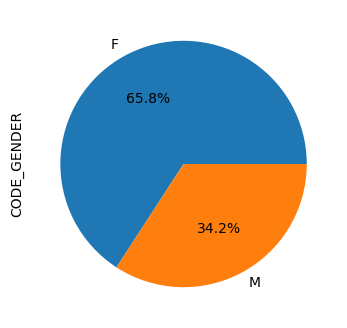

In [54]:
plt.figure(figsize=(4,4))
df.CODE_GENDER.value_counts().plot(kind='pie',autopct="%1.1f%%") 

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

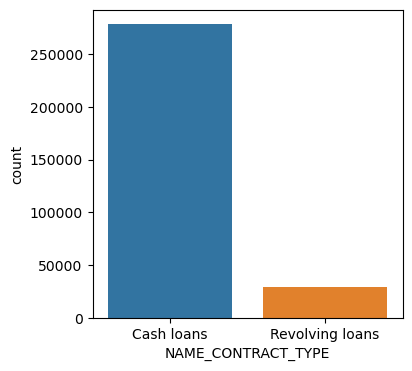

In [55]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x=df['NAME_CONTRACT_TYPE'])

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

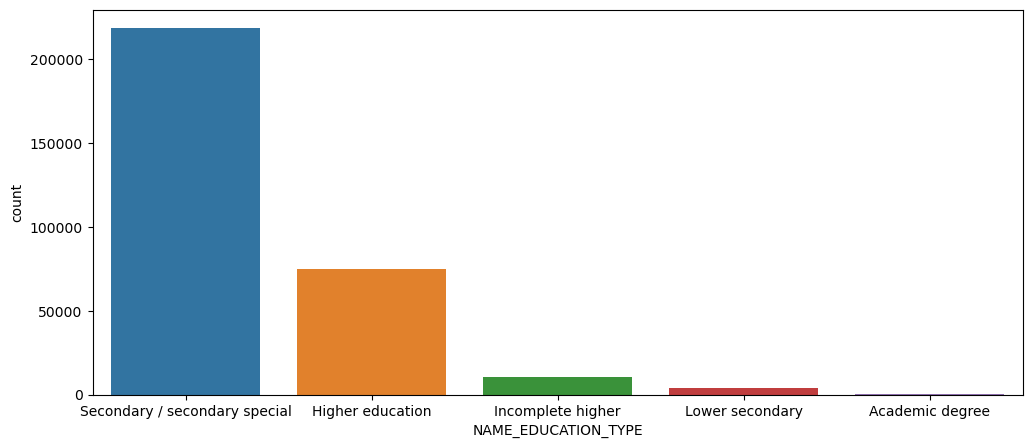

In [56]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x=df['NAME_EDUCATION_TYPE'])

<Axes: ylabel='FLAG_OWN_CAR'>

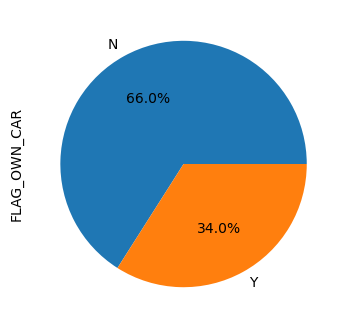

In [57]:
plt.figure(figsize=(4,4))
df['FLAG_OWN_CAR'].value_counts().plot(kind='pie',autopct="%1.1f%%") 

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

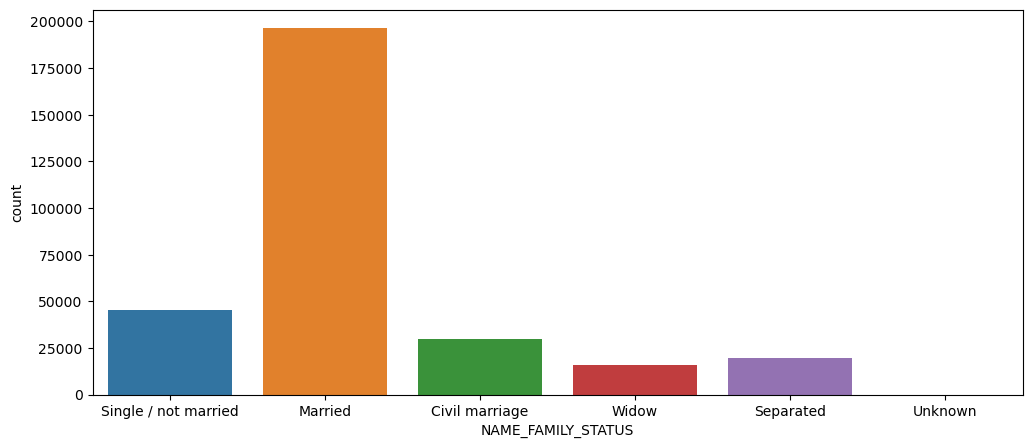

In [58]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x=df['NAME_FAMILY_STATUS'])

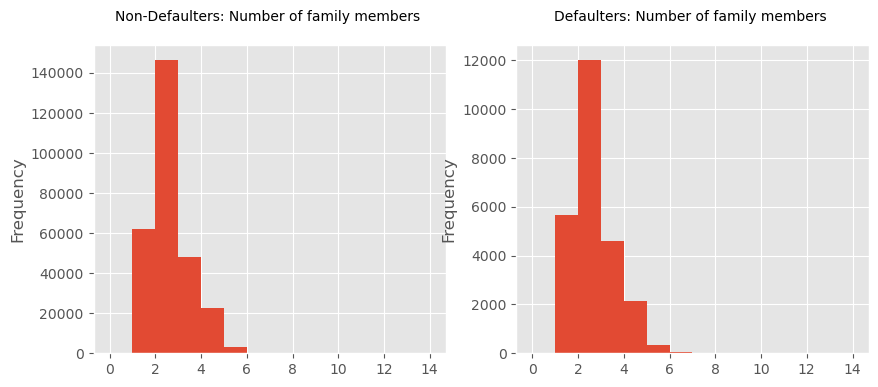

In [59]:
plt.figure(figsize=[10,4]) 
plt.style.use('ggplot')
plt.subplot(1,2,1)
df_target0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Non-Defaulters: Number of family members \n', fontsize=10) 

plt.subplot(1,2,2)
df_target1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Defaulters: Number of family members \n', fontsize=10) 
plt.show()

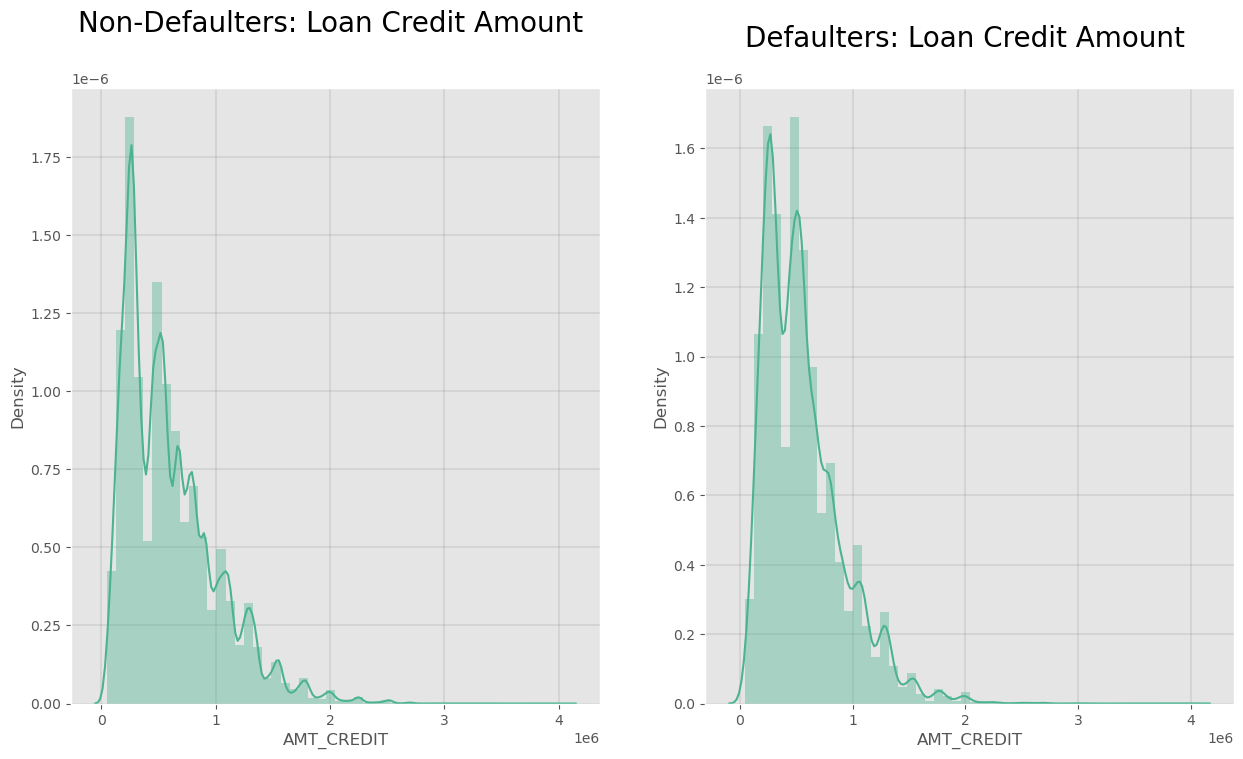

In [60]:
fig, ax =plt.subplots(1,2,figsize=[15,8])
plt.style.use('ggplot')
sns.distplot(a=df_target0['AMT_CREDIT'], ax=ax[0], color="#4CB391")
sns.distplot(a=df_target1['AMT_CREDIT'], ax=ax[1], color="#4CB391")
ax[0].set_title('Non-Defaulters: Loan Credit Amount \n', fontsize=20) 
ax[0].grid(color='black', linestyle='-', linewidth=0.25, alpha=0.4) 
ax[1].set_title('Defaulters: Loan Credit Amount \n', fontsize=20) 
ax[1].grid(color='black', linestyle='-', linewidth=0.25, alpha=0.4) 
plt.show()

## MULTIVARIATE ANALYSIS

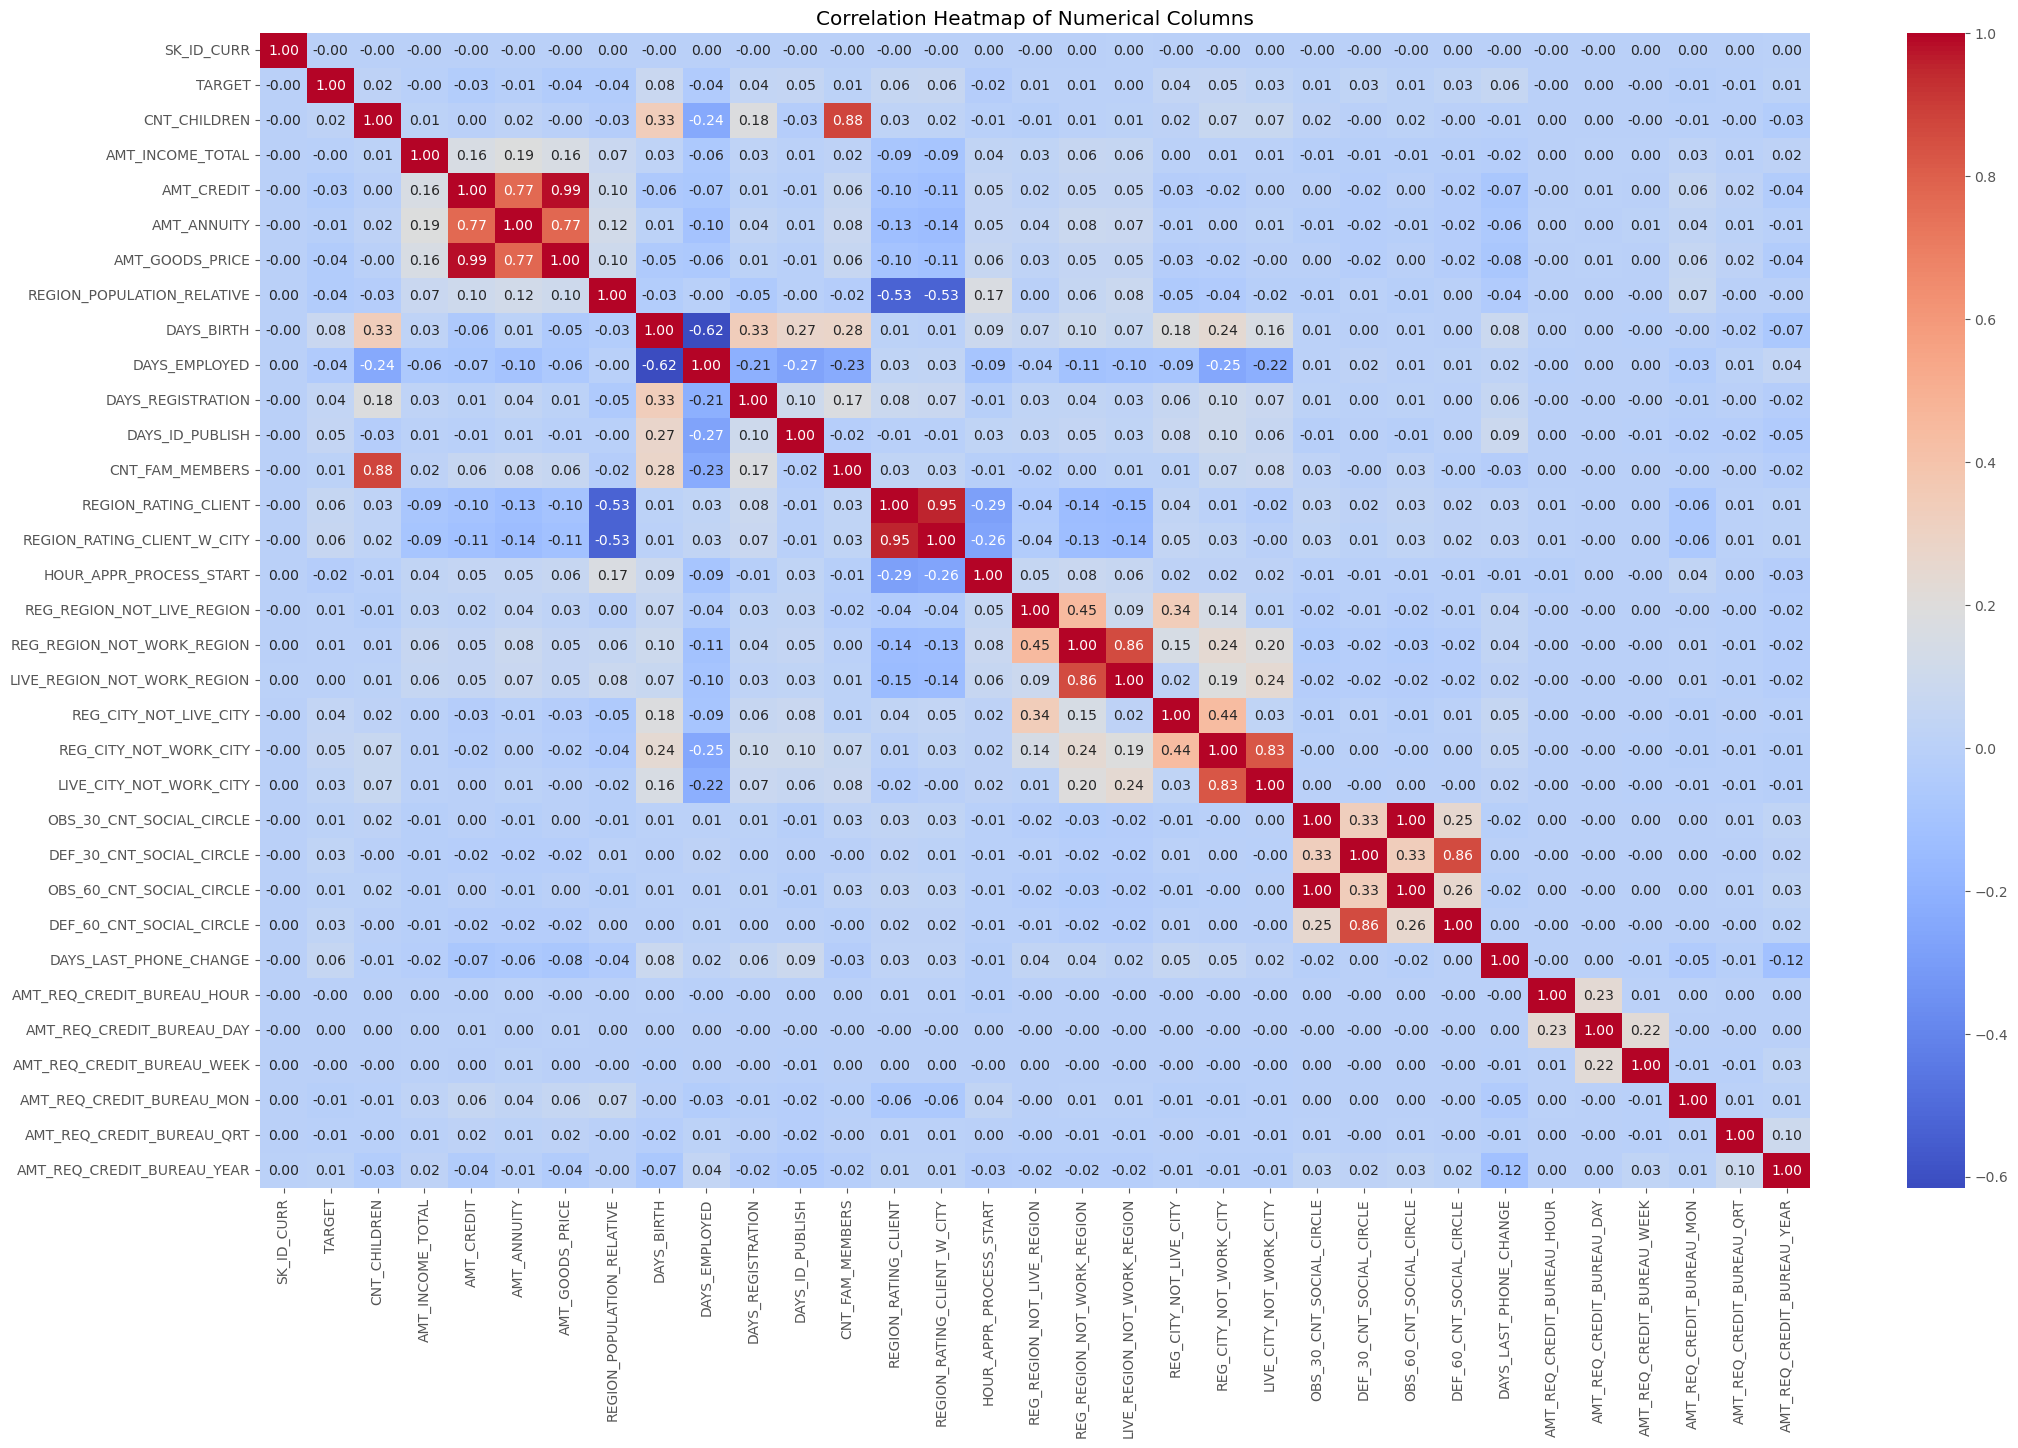

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))
sns.heatmap(data=df_num.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


In [62]:
df_target0_num = df_target0.select_dtypes(include=np.number)
df_target0_num.drop('TARGET', axis=1, inplace=True)

In [63]:
df_target1_num = df_target1.select_dtypes(include=np.number)
df_target1_num.drop('TARGET', axis=1, inplace=True)

### ANALYSIS FOR NON - DEFAULTERS

<Axes: >

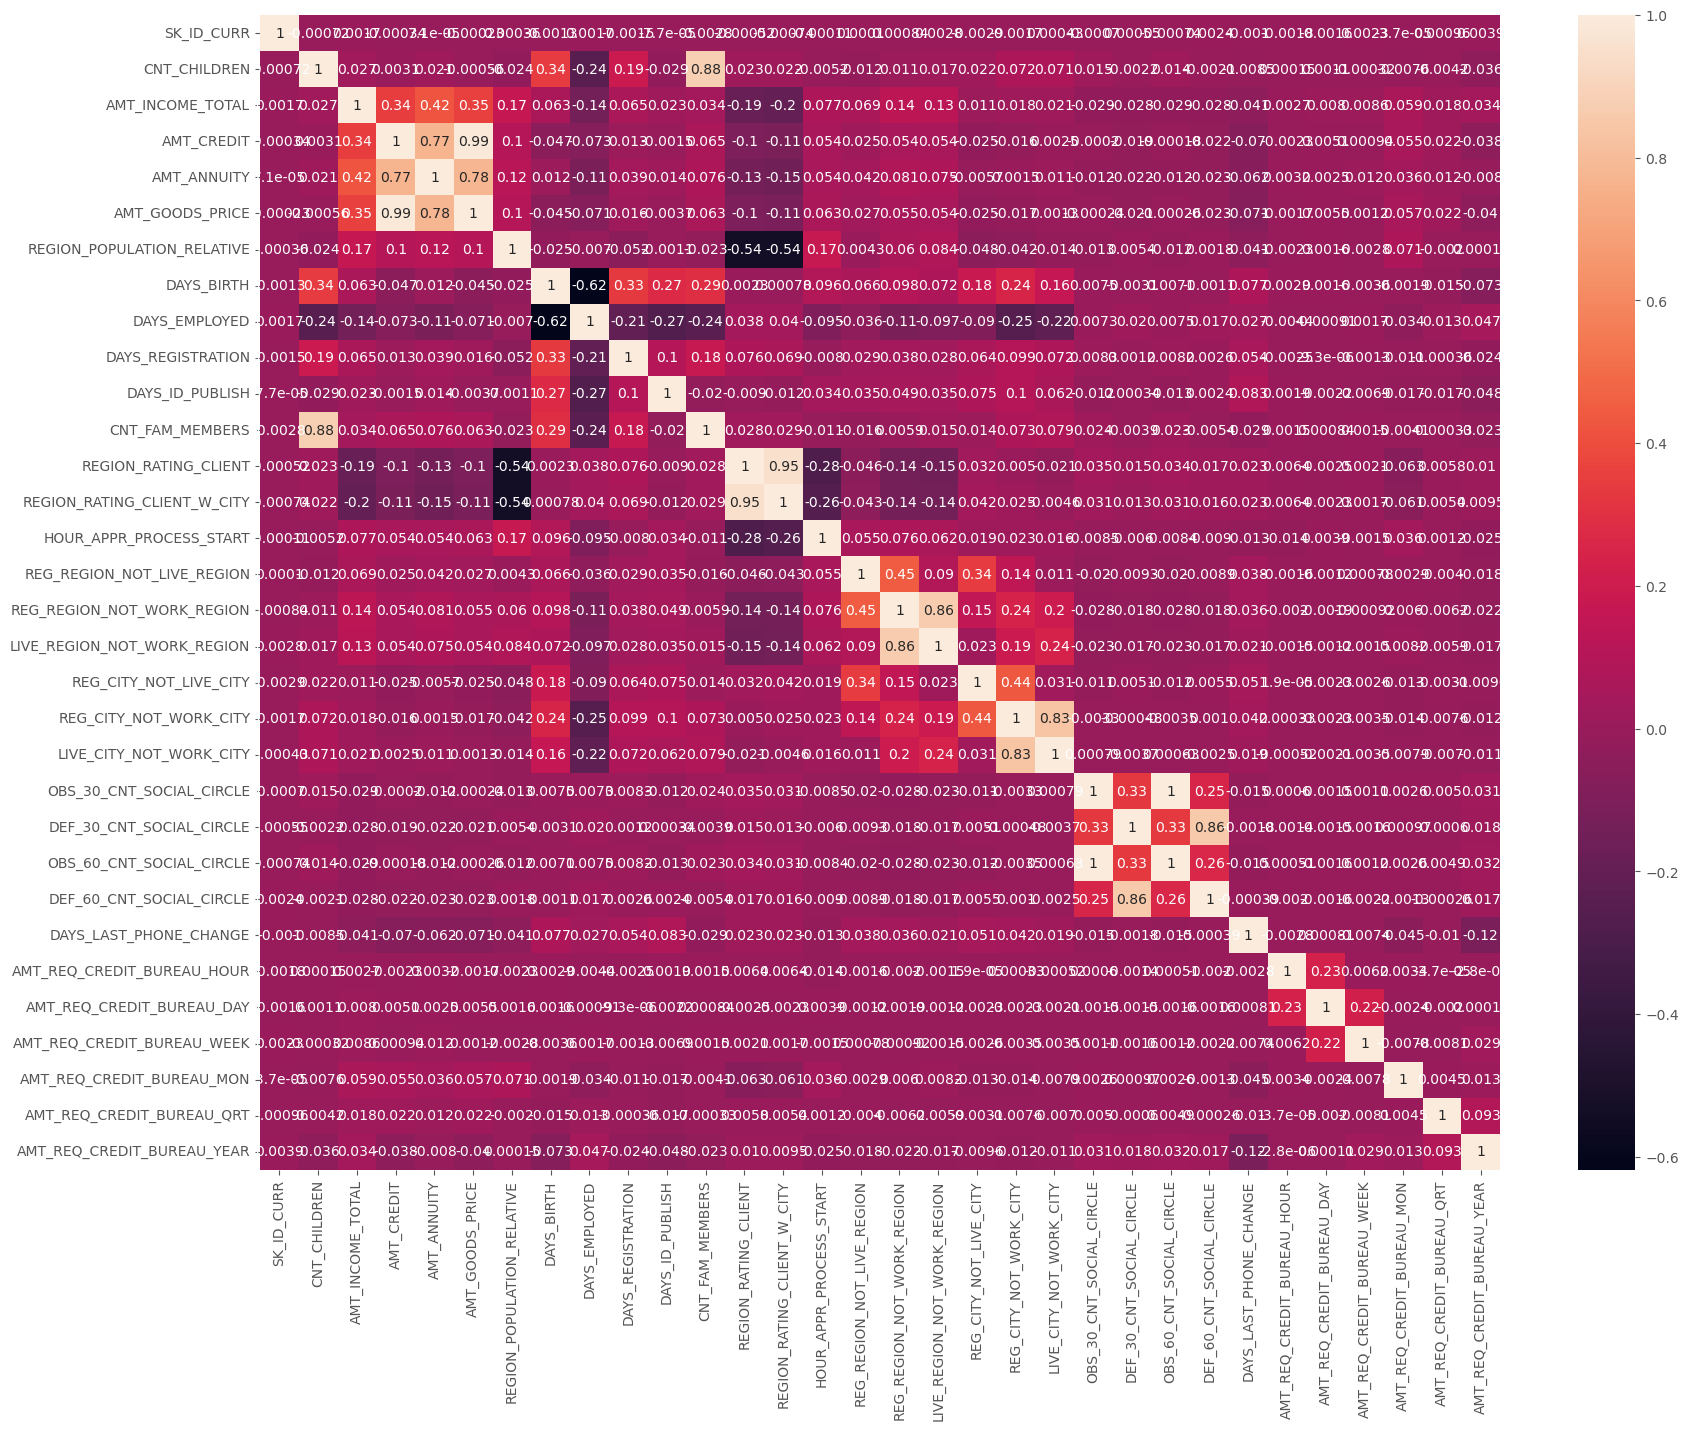

In [64]:
plt.figure(figsize=(20,15))
sns.heatmap(data=df_target0_num.corr(), annot=True)

### ANALYSIS FOR DEFAULTERS

<Axes: >

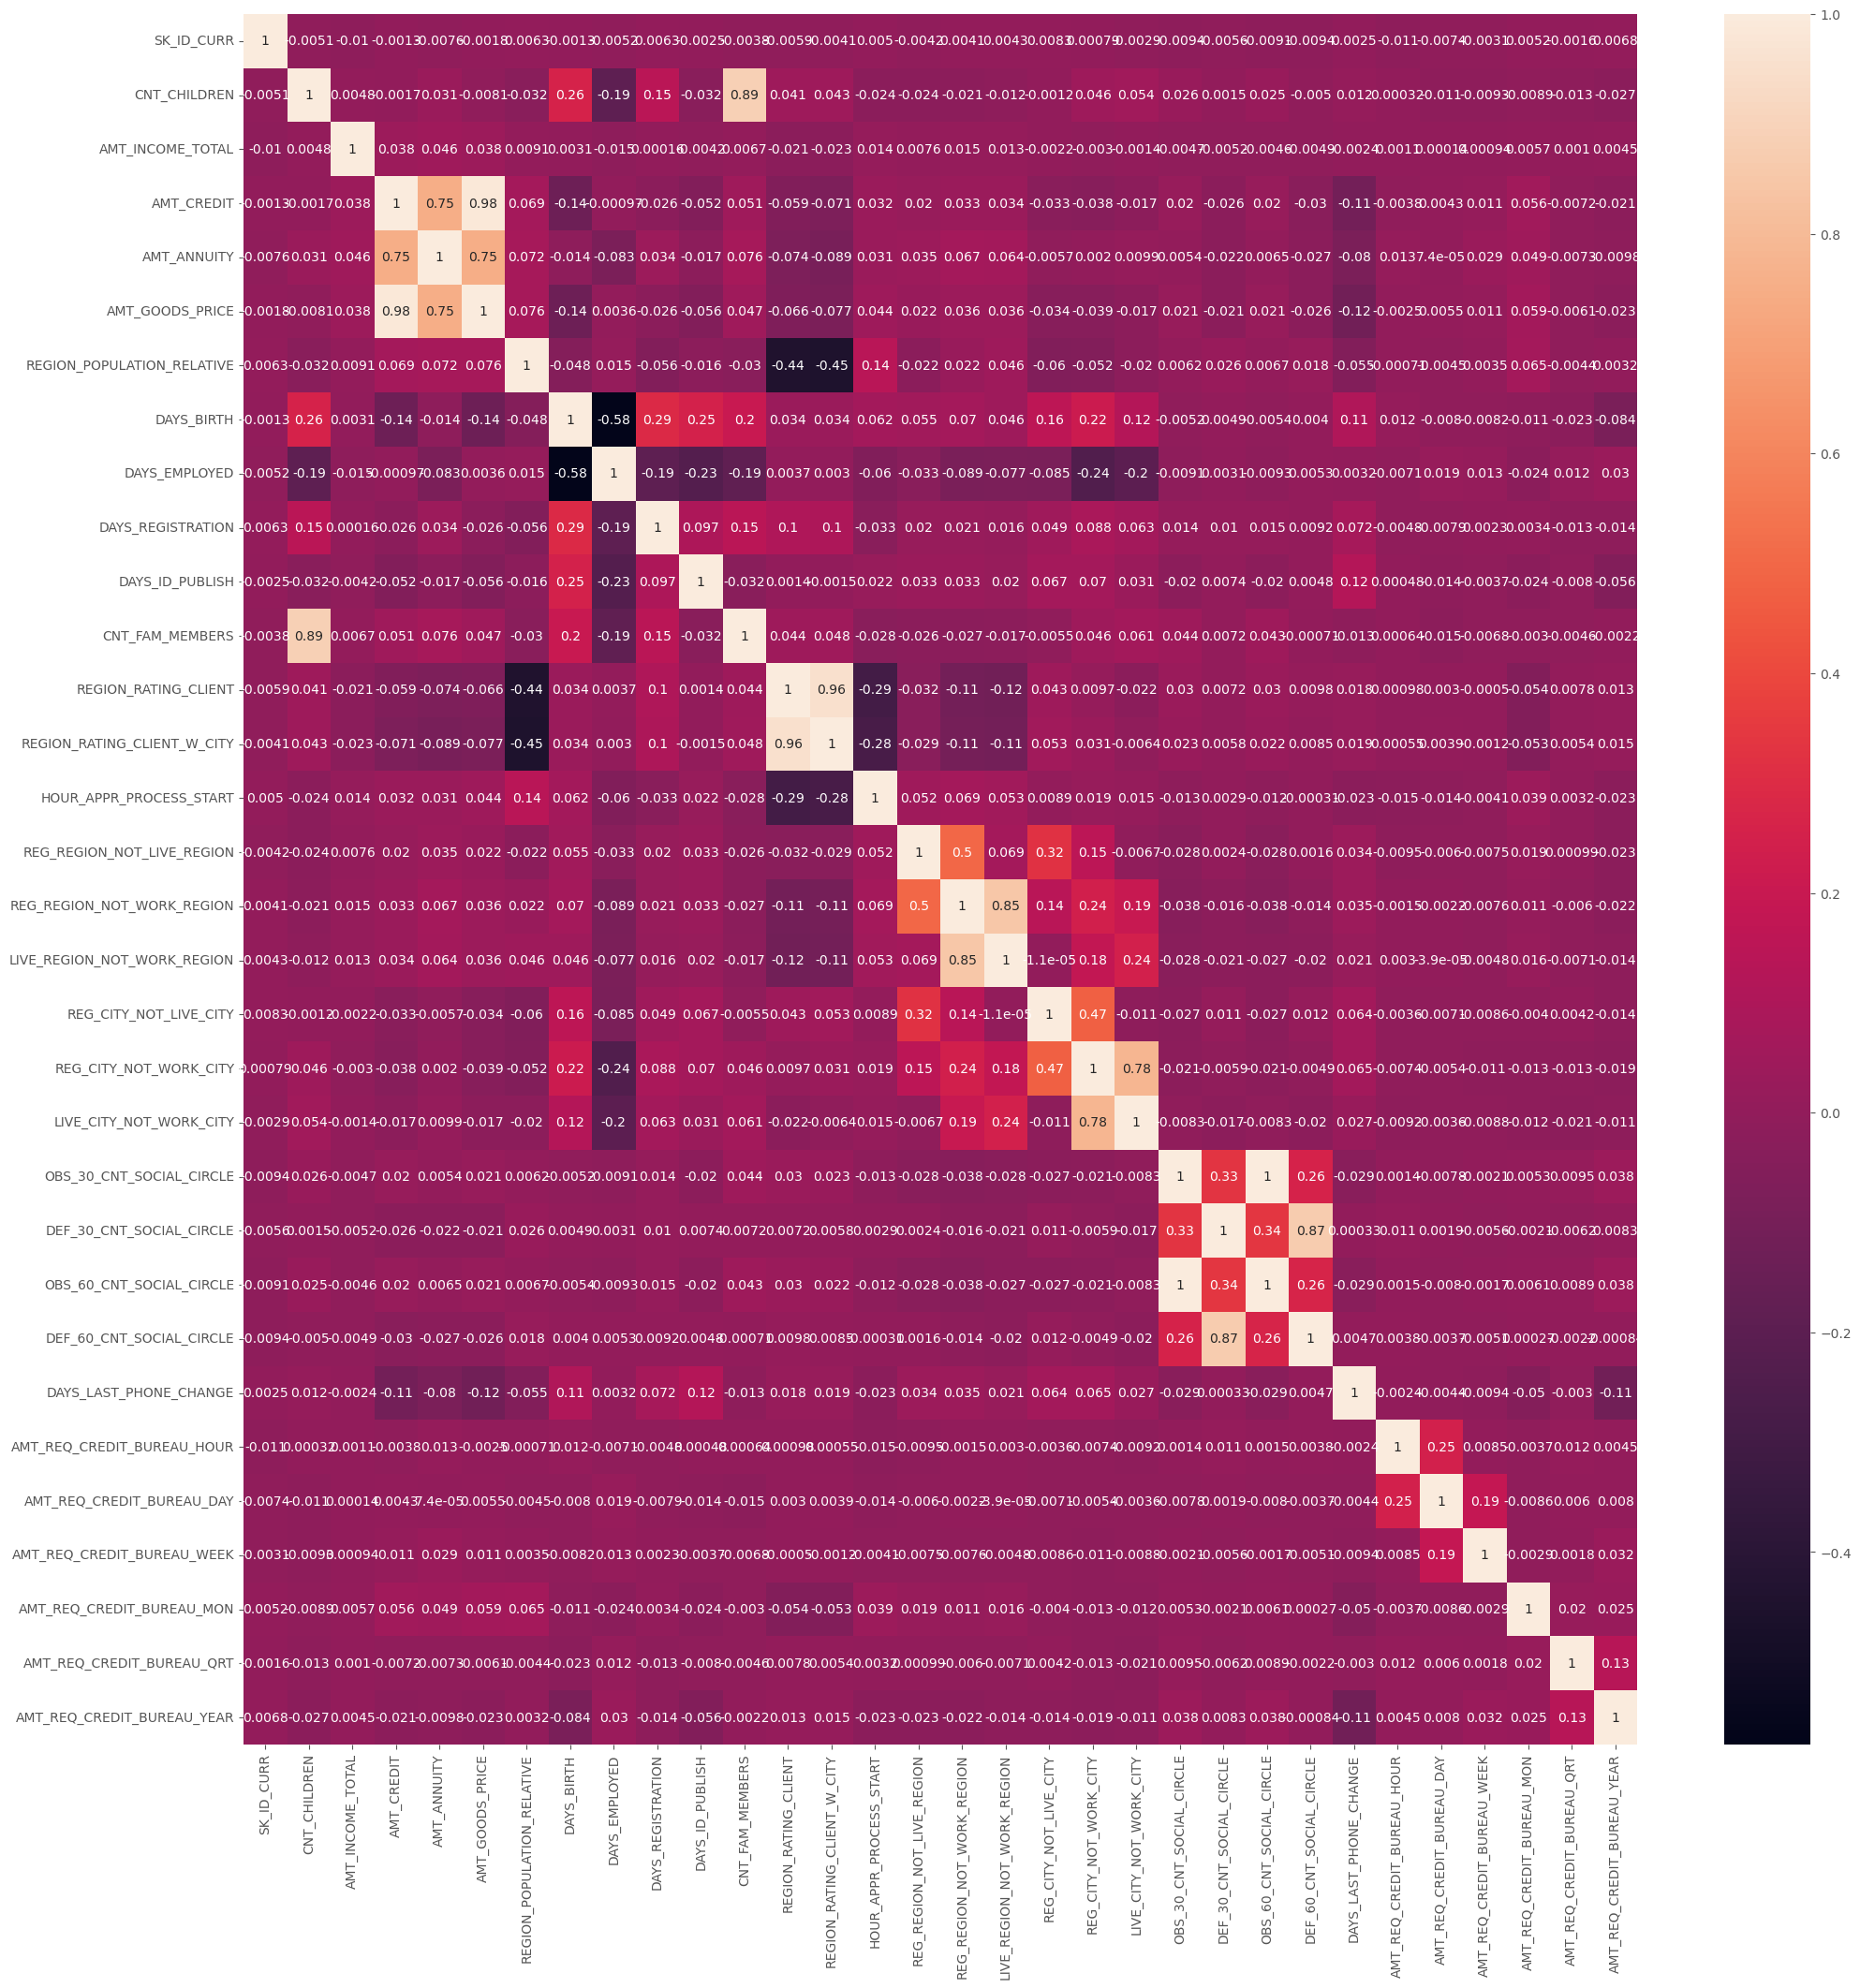

In [65]:
plt.figure(figsize=(24,24))
sns.heatmap(data=df_target1_num.corr(), annot=True)

# Outlier Treatment Analysis

In [66]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  ...  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0           -637  ...                       2.0                       2.0   
1          -1188  ...                       0.0                       1.0   
2           -225  ...                       0.0                       0.0   
3          -3039  ...                       0.0                       2.0   
4          -3038  ...                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                 -1134.0   
1                       0.0                  -828.0   
2                       0.0                  -815.0   
3                       0.0                  -617.0   
4                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         1.0  
4                        0.0                         0.0  

[5 rows x 33 columns]

In [67]:
df_num.drop('TARGET', axis=1, inplace=True)

### OUTLIERS IN FOR LOOP IN NUM VARIABLE

In [68]:
num = df_num

In [69]:
numeric_columns = df.select_dtypes(include=['int64', 'float64', 'int32']).columns

# Define a function to detect outliers using IQR
def find_outliers_iqr(data):
    outliers = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64', 'int32']:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Find outliers using IQR method
outliers_iqr = find_outliers_iqr(df[numeric_columns])
outliers_iqr

{'SK_ID_CURR': Series([], Name: SK_ID_CURR, dtype: int64),
 'TARGET': 0         1
 26        1
 40        1
 42        1
 81        1
          ..
 307448    1
 307475    1
 307481    1
 307489    1
 307509    1
 Name: TARGET, Length: 24825, dtype: int64,
 'CNT_CHILDREN': 91        3
 92        3
 144       3
 180       3
 182       3
          ..
 307293    4
 307329    3
 307387    3
 307462    3
 307501    3
 Name: CNT_CHILDREN, Length: 4272, dtype: int64,
 'AMT_INCOME_TOTAL': 7         360000.0
 22        450000.0
 33        360000.0
 49        360000.0
 51        540000.0
             ...   
 307460    382500.0
 307477    360000.0
 307484    540000.0
 307492    585000.0
 307496    360000.0
 Name: AMT_INCOME_TOTAL, Length: 14035, dtype: float64,
 'AMT_CREDIT': 60        1663987.5
 135       1755000.0
 189       2250000.0
 235       1710000.0
 314       1800000.0
             ...    
 307216    1827549.0
 307252    1724220.0
 307401    1718473.5
 307422    1971072.0
 307476    17621

In [70]:
outlier_counts = {col: len(outliers_iqr[col]) for col in outliers_iqr}
outlier_counts

{'SK_ID_CURR': 0,
 'TARGET': 24825,
 'CNT_CHILDREN': 4272,
 'AMT_INCOME_TOTAL': 14035,
 'AMT_CREDIT': 6562,
 'AMT_ANNUITY': 7504,
 'AMT_GOODS_PRICE': 14728,
 'REGION_POPULATION_RELATIVE': 8412,
 'DAYS_BIRTH': 0,
 'DAYS_EMPLOYED': 72217,
 'DAYS_REGISTRATION': 659,
 'DAYS_ID_PUBLISH': 0,
 'CNT_FAM_MEMBERS': 4007,
 'REGION_RATING_CLIENT': 80527,
 'REGION_RATING_CLIENT_W_CITY': 78027,
 'HOUR_APPR_PROCESS_START': 2257,
 'REG_REGION_NOT_LIVE_REGION': 4657,
 'REG_REGION_NOT_WORK_REGION': 15612,
 'LIVE_REGION_NOT_WORK_REGION': 12503,
 'REG_CITY_NOT_LIVE_CITY': 24039,
 'REG_CITY_NOT_WORK_CITY': 70867,
 'LIVE_CITY_NOT_WORK_CITY': 55215,
 'OBS_30_CNT_SOCIAL_CIRCLE': 19971,
 'DEF_30_CNT_SOCIAL_CIRCLE': 35166,
 'OBS_60_CNT_SOCIAL_CIRCLE': 19564,
 'DEF_60_CNT_SOCIAL_CIRCLE': 25769,
 'DAYS_LAST_PHONE_CHANGE': 435,
 'AMT_REQ_CREDIT_BUREAU_HOUR': 1626,
 'AMT_REQ_CREDIT_BUREAU_DAY': 1489,
 'AMT_REQ_CREDIT_BUREAU_WEEK': 8536,
 'AMT_REQ_CREDIT_BUREAU_MON': 43759,
 'AMT_REQ_CREDIT_BUREAU_QRT': 50575,
 'AMT

In [100]:
outlier_percentage = {col: (len(outliers_iqr[col]) / len(df[col])) * 100 for col in outliers_iqr}

# Converting the dictionary to a DataFrame
outlier_percentage_df = pd.DataFrame.from_dict(outlier_percentage, orient='index', columns=['Percentage'])
outlier_percentage_df

Percentage
SK_ID_CURR                     0.000000
TARGET                         8.072882
CNT_CHILDREN                   1.389219
AMT_INCOME_TOTAL               4.564064
AMT_CREDIT                     2.133907
AMT_ANNUITY                    2.440238
AMT_GOODS_PRICE                4.789422
REGION_POPULATION_RELATIVE     2.735512
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                 23.484363
DAYS_REGISTRATION              0.214301
DAYS_ID_PUBLISH                0.000000
CNT_FAM_MEMBERS                1.303043
REGION_RATING_CLIENT          26.186706
REGION_RATING_CLIENT_W_CITY   25.373726
HOUR_APPR_PROCESS_START        0.733957
REG_REGION_NOT_LIVE_REGION     1.514417
REG_REGION_NOT_WORK_REGION     5.076892
LIVE_REGION_NOT_WORK_REGION    4.065871
REG_CITY_NOT_LIVE_CITY         7.817281
REG_CITY_NOT_WORK_CITY        23.045354
LIVE_CITY_NOT_WORK_CITY       17.955455
OBS_30_CNT_SOCIAL_CIRCLE       6.494402
DEF_30_CNT_SOCIAL_CIRCLE      11.435688
OBS_60_CNT_SOCIAL_CIRCLE       6.362049
DEF_60_CNT_SOCIAL_CIRCLE       8.379863
DAYS_LAST_PHONE_CHANGE         0.141458
AMT_REQ_CREDIT_BUREAU_HOUR     0.528762
AMT_REQ_CREDIT_BUREAU_DAY      0.484210
AMT_REQ_CREDIT_BUREAU_WEEK     2.775836
AMT_REQ_CREDIT_BUREAU_MON     14.230060
AMT_REQ_CREDIT_BUREAU_QRT     16.446566
AMT_REQ_CREDIT_BUREAU_YEAR     2.352111

In [98]:
outlier_percentage =index={col: (len(outliers_iqr[col]) / len(df[col])) * 100 for col in outliers_iqr}
outlier_percentage

{'SK_ID_CURR': 0.0,
 'TARGET': 8.072881945686495,
 'CNT_CHILDREN': 1.3892185970583166,
 'AMT_INCOME_TOTAL': 4.564064374932929,
 'AMT_CREDIT': 2.13390740493836,
 'AMT_ANNUITY': 2.4402379101885785,
 'AMT_GOODS_PRICE': 4.789422167011912,
 'REGION_POPULATION_RELATIVE': 2.735511900387303,
 'DAYS_BIRTH': 0.0,
 'DAYS_EMPLOYED': 23.484363160992615,
 'DAYS_REGISTRATION': 0.21430127702748844,
 'DAYS_ID_PUBLISH': 0.0,
 'CNT_FAM_MEMBERS': 1.3030428179804951,
 'REGION_RATING_CLIENT': 26.186705516225434,
 'REGION_RATING_CLIENT_W_CITY': 25.373726468321458,
 'HOUR_APPR_PROCESS_START': 0.7339574844477108,
 'REG_REGION_NOT_LIVE_REGION': 1.514417370435529,
 'REG_REGION_NOT_WORK_REGION': 5.076891558350758,
 'LIVE_REGION_NOT_WORK_REGION': 4.065870814377372,
 'REG_CITY_NOT_LIVE_CITY': 7.817281333025486,
 'REG_CITY_NOT_WORK_CITY': 23.045354475124466,
 'LIVE_CITY_NOT_WORK_CITY': 17.955455252007248,
 'OBS_30_CNT_SOCIAL_CIRCLE': 6.494401826276134,
 'DEF_30_CNT_SOCIAL_CIRCLE': 11.435688479436507,
 'OBS_60_CNT_SO

# TRANSFORMATION

In [72]:
df_num.skew()

SK_ID_CURR                      -0.001200
CNT_CHILDREN                     1.974604
AMT_INCOME_TOTAL               391.559654
AMT_CREDIT                       1.234778
AMT_ANNUITY                      1.579824
AMT_GOODS_PRICE                  1.350143
REGION_POPULATION_RELATIVE       1.488009
DAYS_BIRTH                      -0.115673
DAYS_EMPLOYED                    1.664346
DAYS_REGISTRATION               -0.590872
DAYS_ID_PUBLISH                  0.349327
CNT_FAM_MEMBERS                  0.987549
REGION_RATING_CLIENT             0.087468
REGION_RATING_CLIENT_W_CITY      0.059730
HOUR_APPR_PROCESS_START         -0.028024
REG_REGION_NOT_LIVE_REGION       7.940276
REG_REGION_NOT_WORK_REGION       4.092767
LIVE_REGION_NOT_WORK_REGION      4.651620
REG_CITY_NOT_LIVE_CITY           3.142781
REG_CITY_NOT_WORK_CITY           1.280138
LIVE_CITY_NOT_WORK_CITY          1.669795
OBS_30_CNT_SOCIAL_CIRCLE        12.143796
DEF_30_CNT_SOCIAL_CIRCLE         5.192572
OBS_60_CNT_SOCIAL_CIRCLE        12

#### After the analysis, Here we found that there are some columns which we need to reduce skewness as well as to treat outliers

In [73]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
trans = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
'DAYS_EMPLOYED','DAYS_REGISTRATION','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START',
'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR']
# Fit the PowerTransformer on the specified columns
df[trans] = pt.fit_transform(df[trans])


In [74]:
df[trans]

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0          -0.653139          0.647486   -0.284044     0.026864   
1          -0.653139          1.212688    1.495411     0.744613   
2          -0.653139         -1.655798   -1.648326    -2.081909   
3          -0.653139         -0.175278   -0.635708     0.377883   
4          -0.653139         -0.394208    0.042354    -0.198114   
...              ...               ...         ...          ...   
307506     -0.653139          0.141189   -0.898260     0.234123   
307507     -0.653139         -1.513877   -0.826751    -1.220742   
307508     -0.653139          0.082025    0.452906     0.397006   
307509     -0.653139          0.308172   -0.411994    -0.340652   
307510     -0.653139          0.141189    0.446942     1.415697   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
0             -0.324481                    0.047087       0.276851   
1              1.434256                   -1.730597       0.137695   
2             -1.534471                   -0.863129       0.362878   
3             -0.549758                   -1.112298      -0.435923   
4              0.210502                    0.800124      -0.435582   
...                 ...                         ...            ...   
307506        -0.910927                    1.036744       0.360895   
307507        -0.910927                    0.560413       1.344824   
307508         0.403446                   -1.518591      -2.351184   
307509        -0.452031                   -1.474787      -1.069517   
307510         0.618399                    1.664649       0.117535   

        DAYS_REGISTRATION  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                0.171087             -0.098083                    -0.061764   
1                1.122551             -2.085045                    -2.054948   
2               -0.007087             -0.098083                    -0.061764   
3               -1.245078             -0.098083                    -0.061764   
4               -0.021335             -0.098083                    -0.061764   
...                   ...                   ...                          ...   
307506          -0.982163             -2.085045                    -2.054948   
307507          -0.042686             -0.098083                    -0.061764   
307508          -0.621521              1.849689                     1.923970   
307509           0.529262             -0.098083                    -0.061764   
307510          -0.238971             -2.085045                    -2.054948   

        ...  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0       ...                  2.784059                  1.004789   
1       ...                 -0.359337                  0.521306   
2       ...                 -0.359337                 -0.886085   
3       ...                 -0.359337                  1.004789   
4       ...                 -0.359337                 -0.886085   
...     ...                       ...                       ...   
307506  ...                 -0.359337                 -0.886085   
307507  ...                 -0.359337                 -0.886085   
307508  ...                 -0.359337                  1.574467   
307509  ...                 -0.359337                 -0.886085   
307510  ...                 -0.359337                 -0.886085   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       3.306626               -0.479300   
1                      -0.302429               -0.197396   
2                      -0.302429               -0.184116   
3                      -0.302429                0.036359   
4                      -0.302429               -0.455585   
...                          ...                     ...   
307506                 -0.302429                0.558568   
307507                 -0.302429                1.787751   
307508                 -0.302429               -1.030543

# SCALING

In [75]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scale = ['DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS']  # List of columns to be standardized

# Fit the StandardScaler on the specified columns
df[scale] = ss.fit_transform(df[scale])


In [76]:
df[scale]

DAYS_BIRTH  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS
0         1.506880         0.579154        -1.265722
1        -0.166821         1.790855        -0.167638
2        -0.689509         0.306869        -1.265722
3        -0.680114         0.369143        -0.167638
4        -0.892535        -0.307263        -1.265722
...            ...              ...              ...
307506    1.537586         0.670578        -1.265722
307507   -1.085707        -0.725959        -1.265722
307508    0.245417        -1.428203        -1.265722
307509    0.934008         1.366859        -0.167638
307510   -0.187674         1.712018        -0.167638

[307511 rows x 3 columns]

# ENCODING

In [77]:
df_cat = df.select_dtypes(include=['object', 'category'])

In [78]:
df_cat.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_PHONE  \
0  House / apartment              1               0          1   
1  House / apartment              1               0          1   
2  House / apartment              1               1          1   
3  House / apartment              1               0          0   
4  House / apartment              1               0          0   

  OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  
0        Laborers                  WEDNESDAY  Business Entity Type 3  
1      Core staff                     MONDAY                  School  
2        Laborers                     MONDAY              Government  
3        Laborers                  WEDNESDAY  Business Entity Type 3  
4      Core staff                   THURSDAY                Religion

In [79]:
df1 = pd.get_dummies(data=df)

In [80]:
df1

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1     -0.653139          0.647486   -0.284044   
1           100003       0     -0.653139          1.212688    1.495411   
2           100004       0     -0.653139         -1.655798   -1.648326   
3           100006       0     -0.653139         -0.175278   -0.635708   
4           100007       0     -0.653139         -0.394208    0.042354   
...            ...     ...           ...               ...         ...   
307506      456251       0     -0.653139          0.141189   -0.898260   
307507      456252       0     -0.653139         -1.513877   -0.826751   
307508      456253       0     -0.653139          0.082025    0.452906   
307509      456254       1     -0.653139          0.308172   -0.411994   
307510      456255       0     -0.653139          0.141189    0.446942   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0          0.026864        -0.324481                    0.047087    1.506880   
1          0.744613         1.434256                   -1.730597   -0.166821   
2         -2.081909        -1.534471                   -0.863129   -0.689509   
3          0.377883        -0.549758                   -1.112298   -0.680114   
4         -0.198114         0.210502                    0.800124   -0.892535   
...             ...              ...                         ...         ...   
307506     0.234123        -0.910927                    1.036744    1.537586   
307507    -1.220742        -0.910927                    0.560413   -1.085707   
307508     0.397006         0.403446                   -1.518591    0.245417   
307509    -0.340652        -0.452031                   -1.474787    0.934008   
307510     1.415697         0.618399                    1.664649   -0.187674   

        DAYS_EMPLOYED  ...  ORGANIZATION_TYPE_Trade: type 3  \
0            0.276851  ...                                0   
1            0.137695  ...                                0   
2            0.362878  ...                                0   
3           -0.435923  ...                                0   
4           -0.435582  ...                                0   
...               ...  ...                              ...   
307506       0.360895  ...                                0   
307507       1.344824  ...                                0   
307508      -2.351184  ...                                0   
307509      -1.069517  ...                                0   
307510       0.117535  ...                                0   

        ORGANIZATION_TYPE_Trade: type 4  ORGANIZATION_TYPE_Trade: type 5  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   
...                                 ...                              ...   
307506                                0                                0   
307507                                0                                0   
307508                                0                                0   
307509                                0                                0   
307510                                0                                0   

        ORGANIZATION_TYPE_Trade: type 6  ORGANIZATION_TYPE_Trade: type 7  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   
...                             

# TRAIN TEST SPLIT

In [81]:
df1.drop('SK_ID_CURR', axis=1, inplace=True)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x = df1.drop('TARGET', axis=1)
y = df1['TARGET']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30, random_state=1)

# Model Building

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
y_pred_dt = dt.predict(xtest)
y_pred_dt
print(classification_report(ytest, y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     84787
           1       0.11      0.13      0.12      7467

    accuracy                           0.85     92254
   macro avg       0.52      0.52      0.52     92254
weighted avg       0.86      0.85      0.85     92254



In [85]:
confusion_matrix(ytest, y_pred_dt)

array([[77098,  7689],
       [ 6468,   999]], dtype=int64)

In [86]:

accuracy_score(ytest, y_pred_dt)

0.8465432393175364

In [87]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Assuming you have already split the data and trained the DecisionTreeClassifier as shown earlier

# Predicting on the test set
y_pred_dt = dt.predict(xtest)

# Calculating classification report
report = classification_report(ytest, y_pred_dt, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()

# Calculating accuracy
accuracy = accuracy_score(ytest, y_pred_dt)

# Calculating confusion matrix
cm = confusion_matrix(ytest, y_pred_dt)
df_cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Displaying the results
print("Classification Report:")
df_classification_report


Classification Report:


precision    recall  f1-score       support
0              0.922600  0.909314  0.915909  84787.000000
1              0.114986  0.133789  0.123677   7467.000000
accuracy       0.846543  0.846543  0.846543      0.846543
macro avg      0.518793  0.521551  0.519793  92254.000000
weighted avg   0.857232  0.846543  0.851786  92254.000000

In [88]:
print("\nAccuracy Score:", accuracy)
print("\nConfusion Matrix:")
df_cm



Accuracy Score: 0.8465432393175364

Confusion Matrix:


Predicted 0  Predicted 1
Actual 0        77098         7689
Actual 1         6468          999

In [89]:
print("\nAccuracy Score:", accuracy)




Accuracy Score: 0.8465432393175364


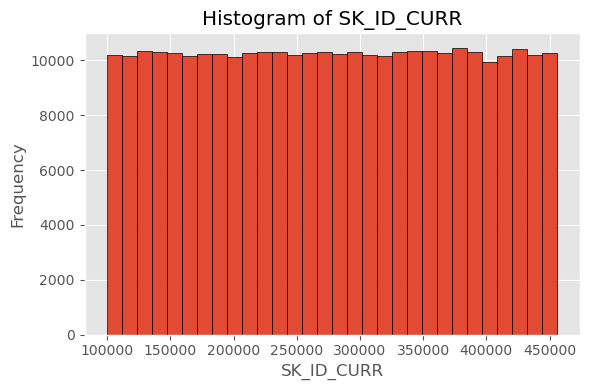

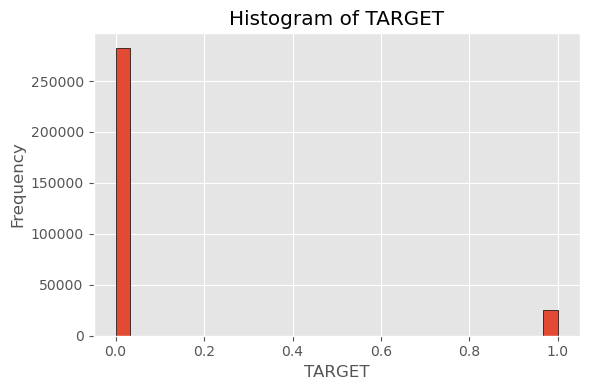

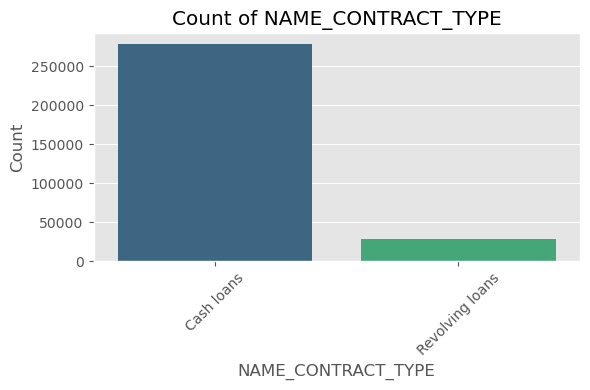

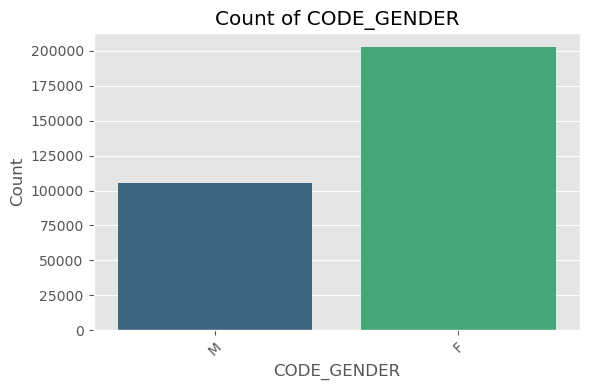

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

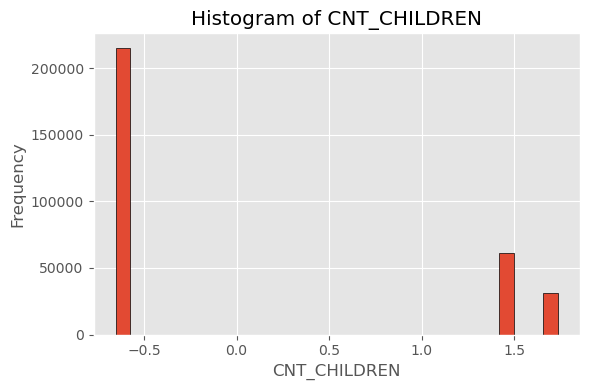

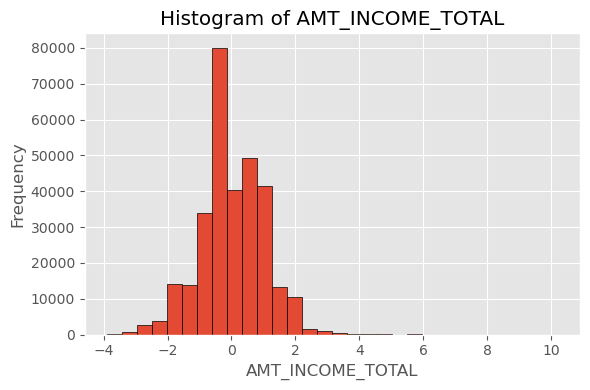

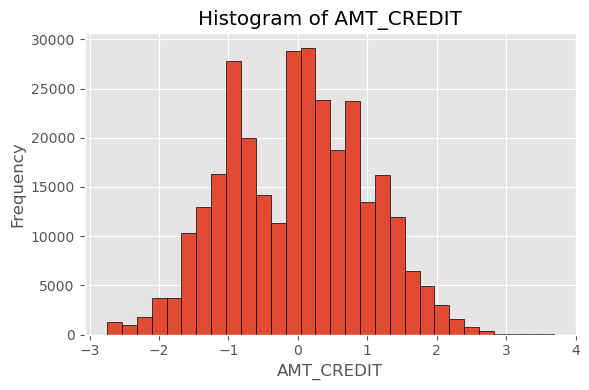

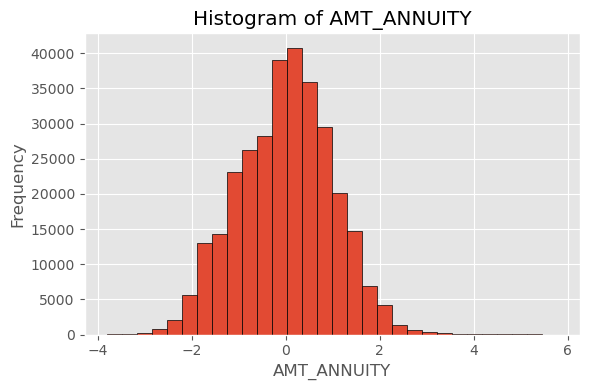

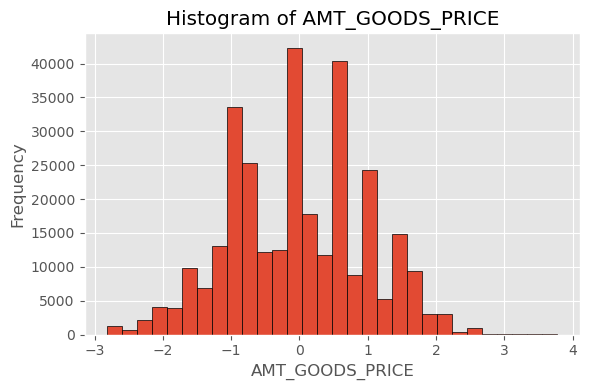

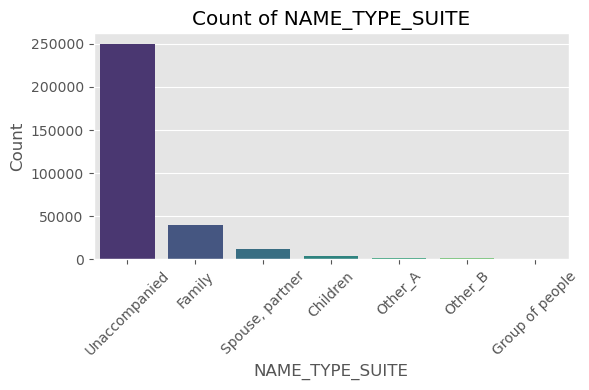

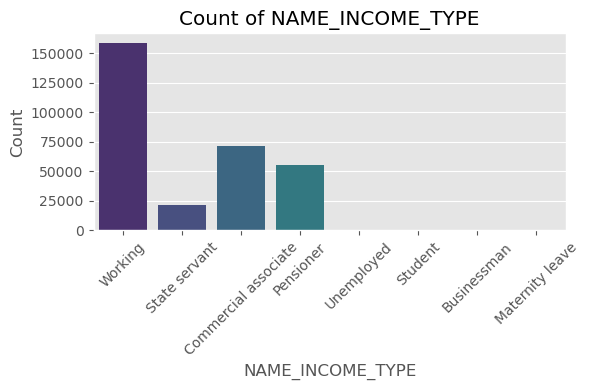

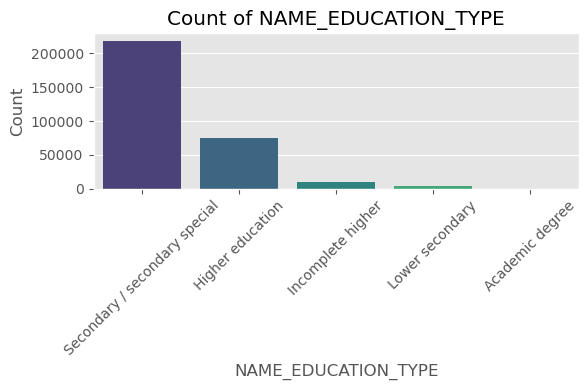

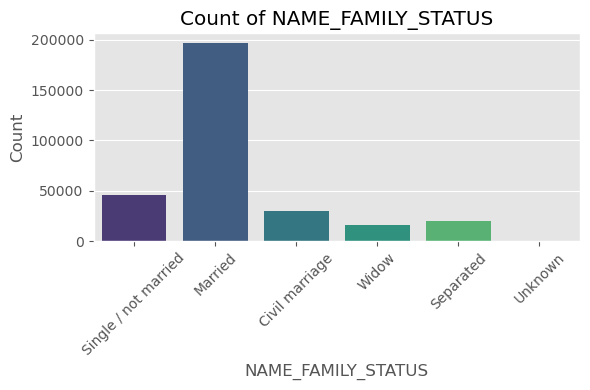

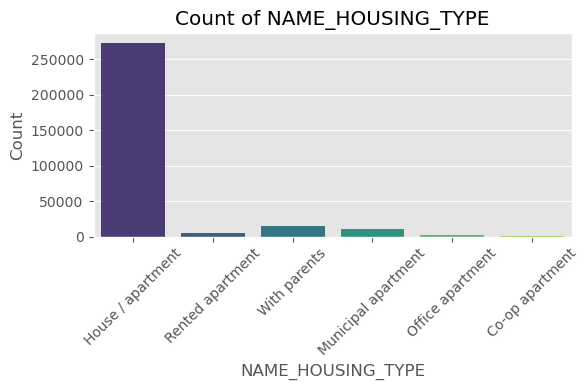

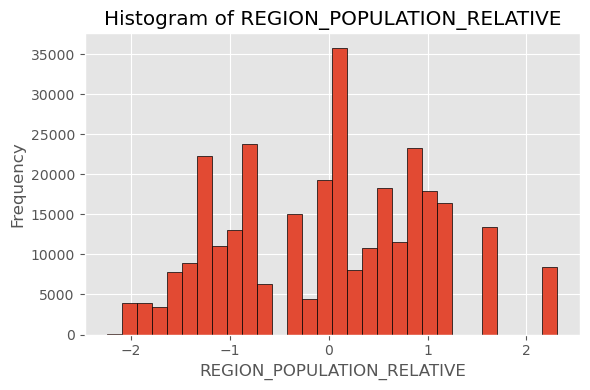

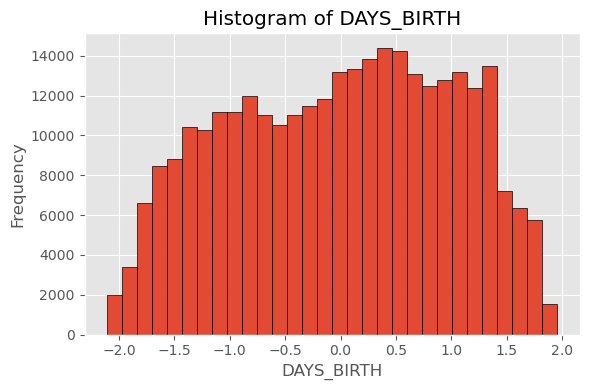

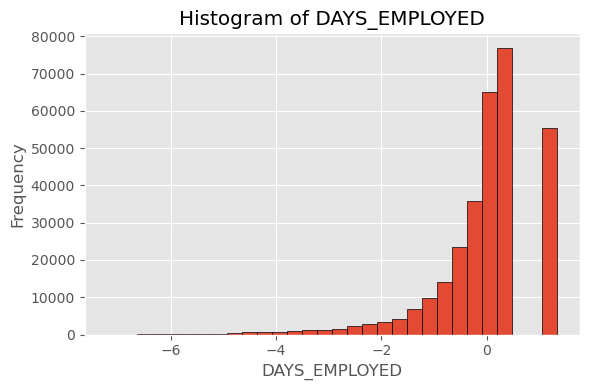

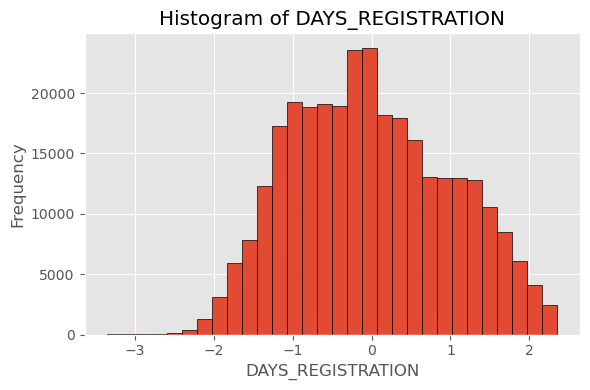

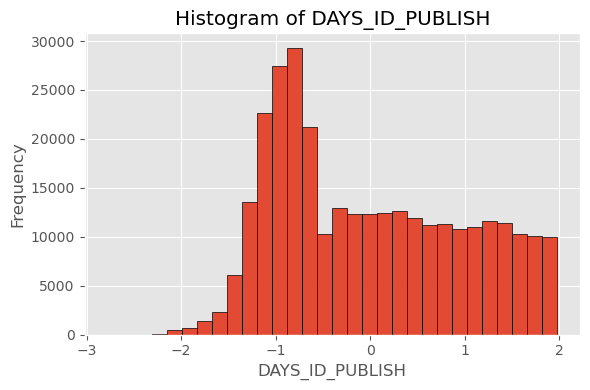

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

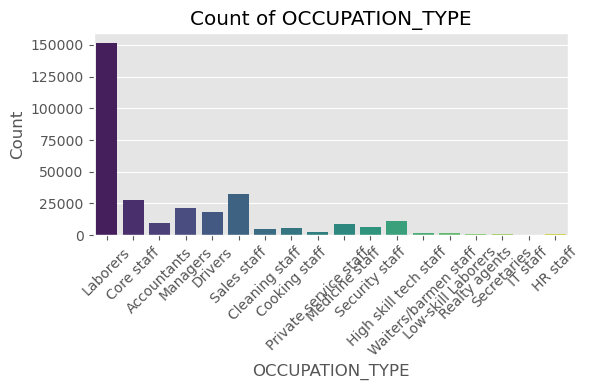

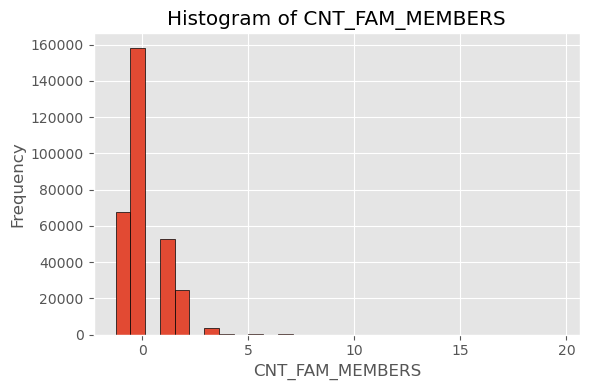

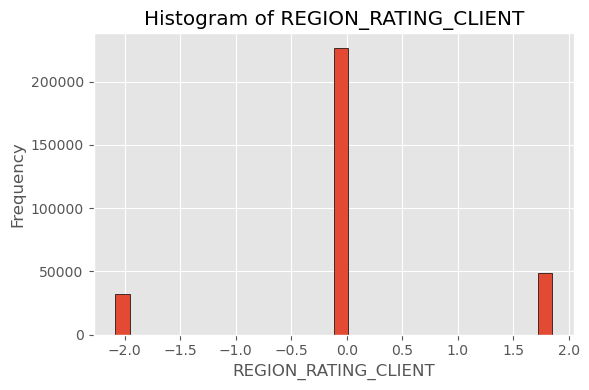

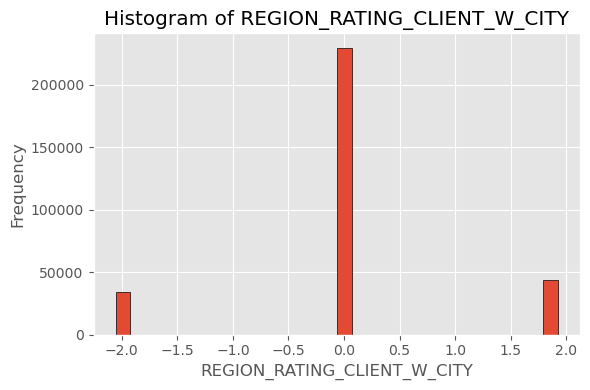

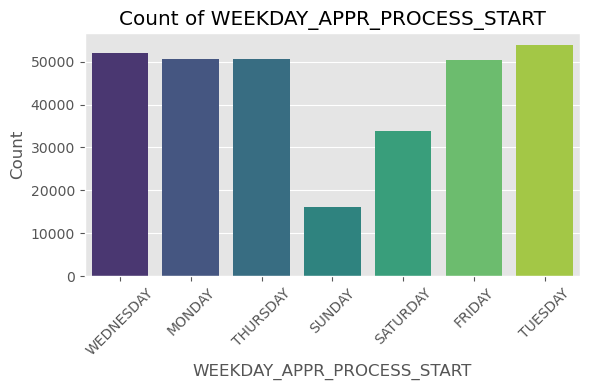

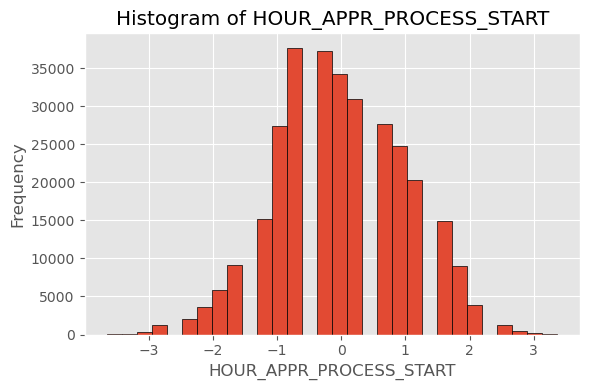

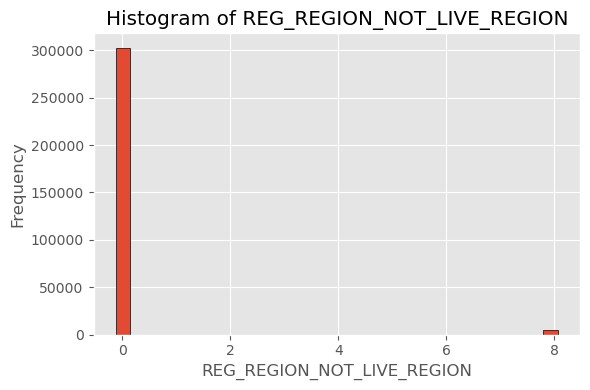

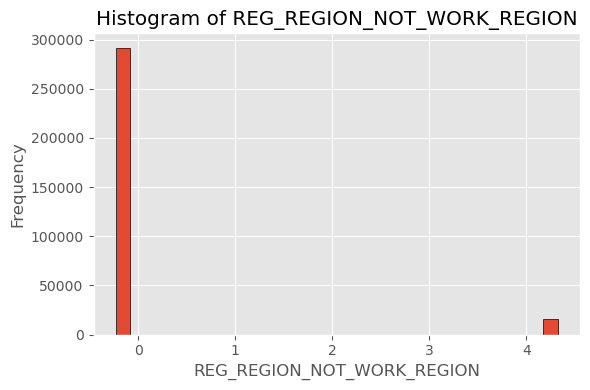

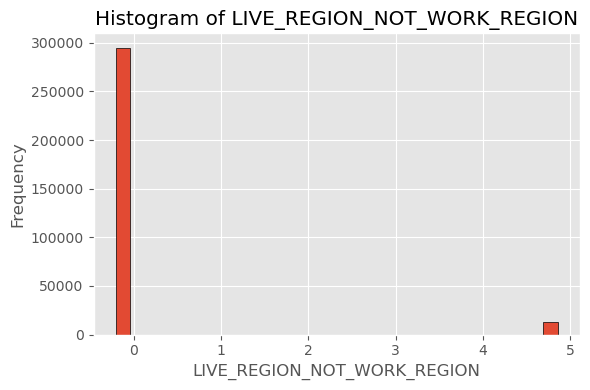

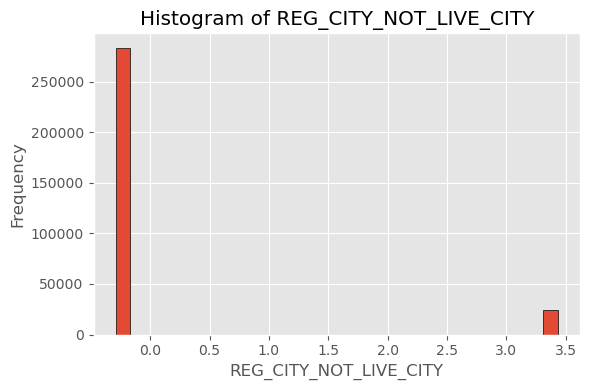

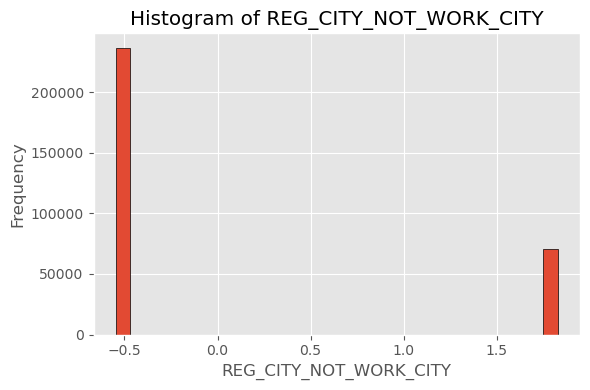

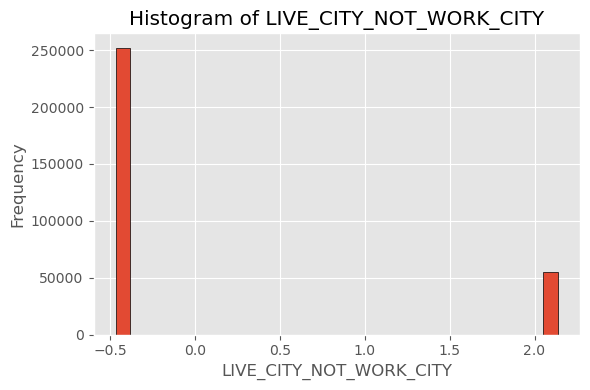

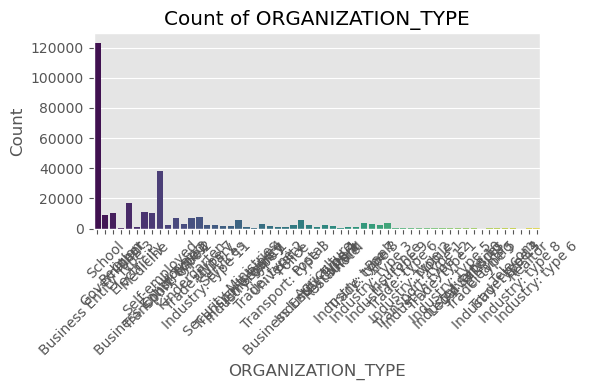

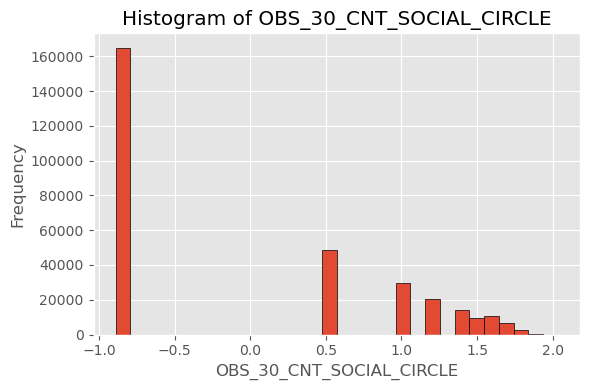

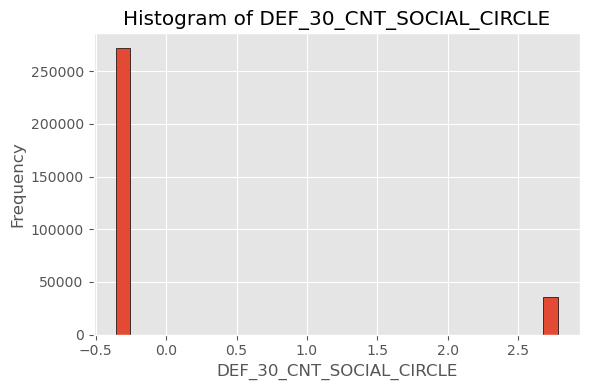

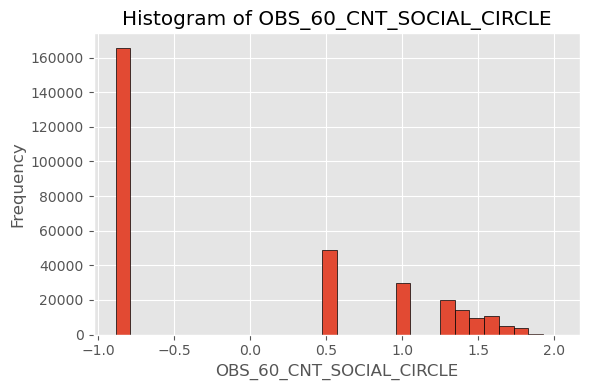

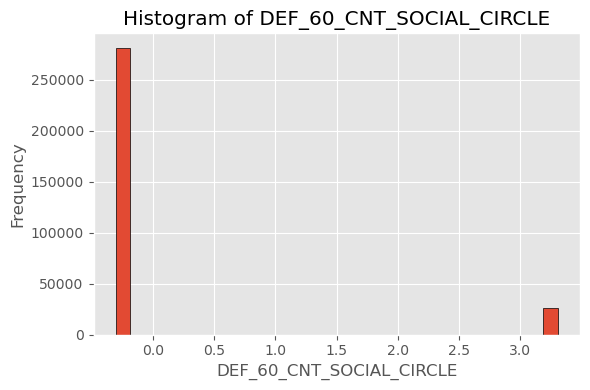

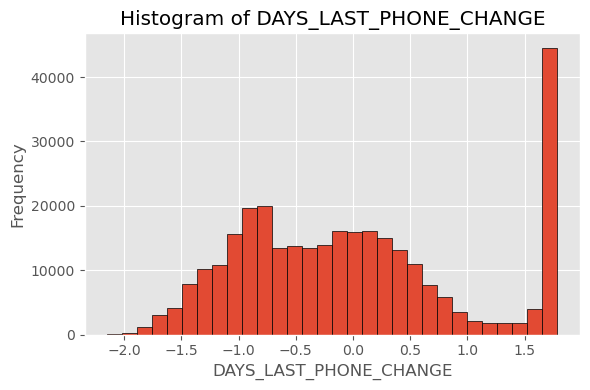

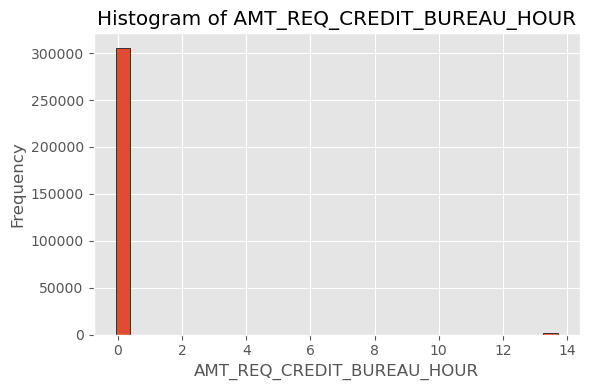

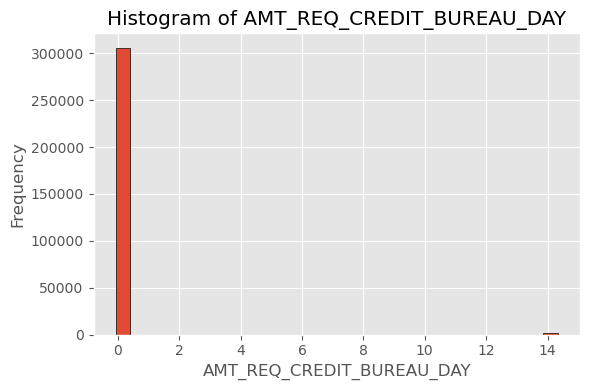

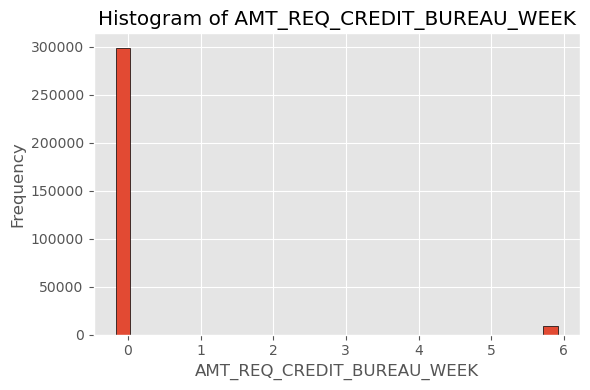

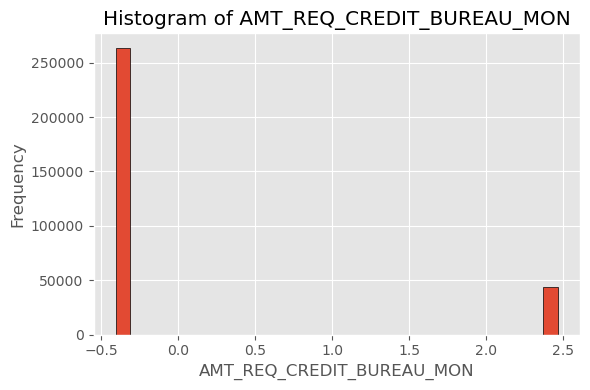

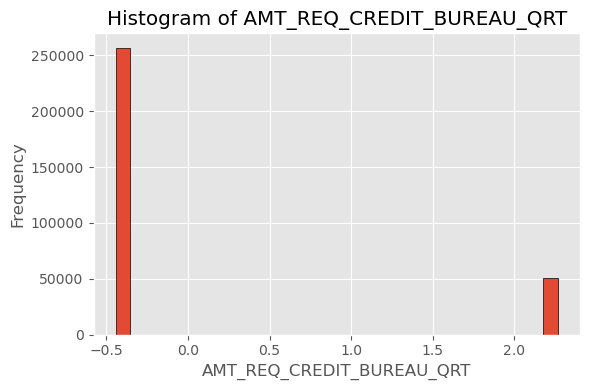

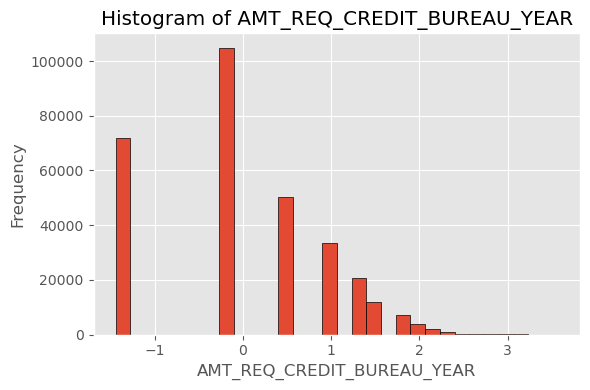

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each column
for col in df.columns:
    plt.figure(figsize=(6, 4))

    # For numeric columns
    if df[col].dtype in ['int64', 'float64']:
        plt.hist(df[col].dropna(), bins=30, edgecolor='black')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {col}')

    # For categorical columns
    elif df[col].dtype == 'object':
        sns.countplot(data=df, x=col, palette='viridis')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title(f'Count of {col}')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


In [104]:
important_columns = []

for col in df.columns:
    # For numeric columns
    if df[col].dtype in ['int64', 'float64']:
        # Check for certain criteria (e.g., high variance, unique values, etc.)
        if len(df[col].unique()) > 10:  # Check for columns with more than 10 unique values
            important_columns.append(col)
    
    # For categorical columns
    elif df[col].dtype == 'object':
        # Check for certain criteria (e.g., number of unique categories, etc.)
        if len(df[col].unique()) > 5:  # Check for columns with more than 5 unique categories
            important_columns.append(col)

print(important_columns)


['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


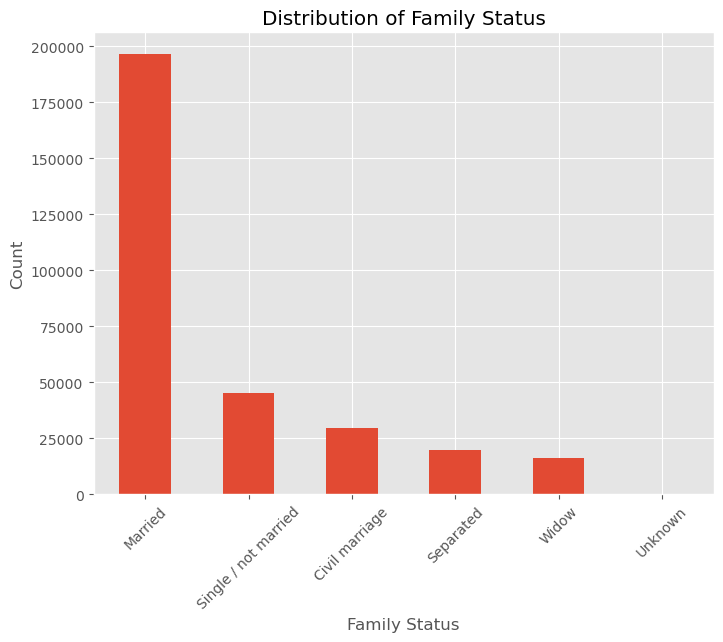

In [105]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
family_status_counts = df['NAME_FAMILY_STATUS'].value_counts()

# Plotting the distribution of family status
plt.figure(figsize=(8, 6))
family_status_counts.plot(kind='bar')
plt.title('Distribution of Family Status')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


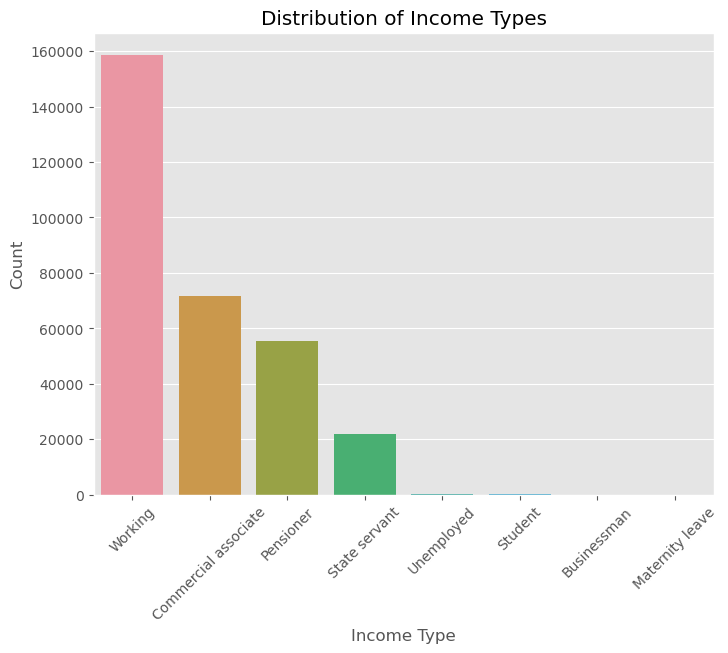

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
income_type_counts = df['NAME_INCOME_TYPE'].value_counts()

# Plotting the distribution of income types
plt.figure(figsize=(8, 6))
sns.barplot(x=income_type_counts.index, y=income_type_counts.values)
plt.title('Distribution of Income Types')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [108]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

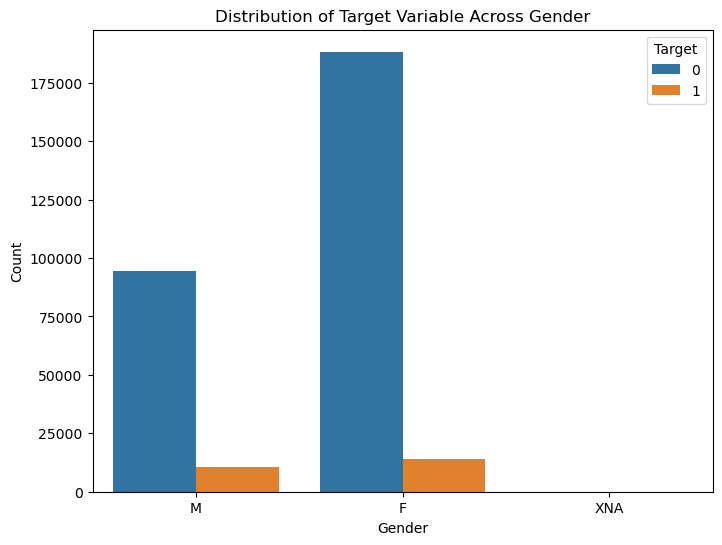

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CODE_GENDER', hue='TARGET')
plt.title('Distribution of Target Variable Across Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Target', labels=['0', '1'])  # Assuming 0 and 1 represent different target classes
plt.show()


In [5]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [3]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

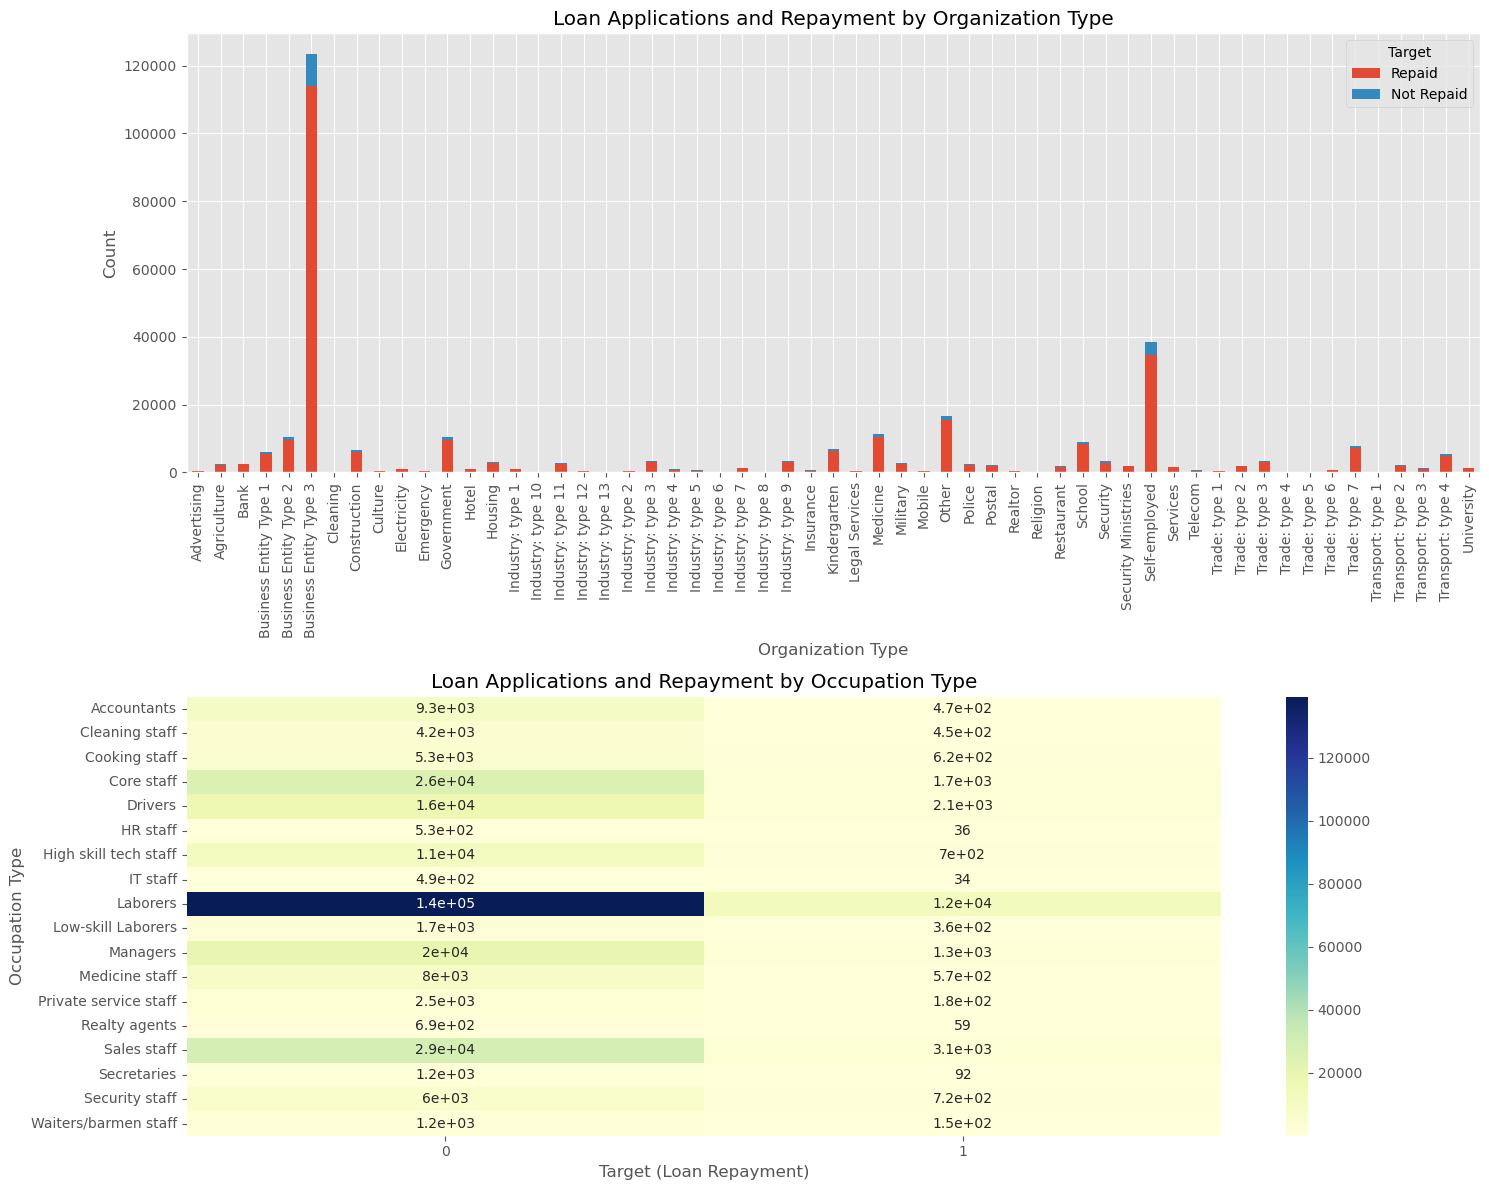

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Organization Type and Occupation Type, count loan status
pivot_org_target = df.groupby(['ORGANIZATION_TYPE', 'TARGET']).size().unstack()
pivot_occ_target = df.groupby(['OCCUPATION_TYPE', 'TARGET']).size().unstack()

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot for Organization Type
pivot_org_target.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Loan Applications and Repayment by Organization Type')
axes[0].set_xlabel('Organization Type')
axes[0].set_ylabel('Count')
axes[0].legend(title='Target', labels=['Repaid', 'Not Repaid'])
axes[0].tick_params(axis='x', rotation=90)

# Plot for Occupation Type
sns.heatmap(pivot_occ_target, annot=True, cmap='YlGnBu', ax=axes[1])
axes[1].set_title('Loan Applications and Repayment by Occupation Type')
axes[1].set_xlabel('Target (Loan Repayment)')
axes[1].set_ylabel('Occupation Type')

plt.tight_layout()
plt.show()


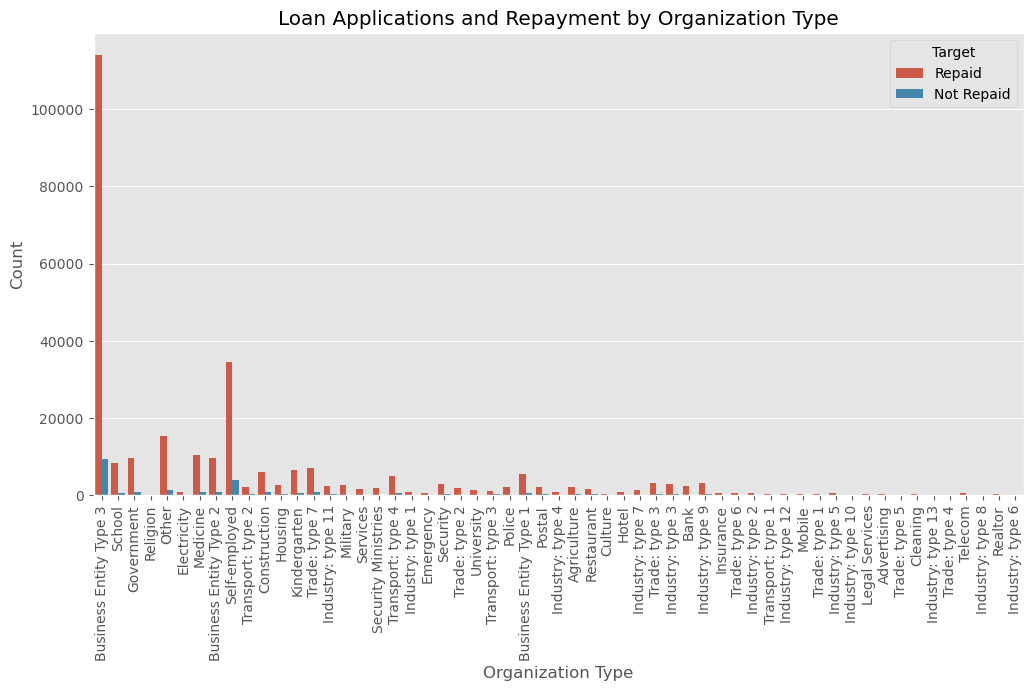

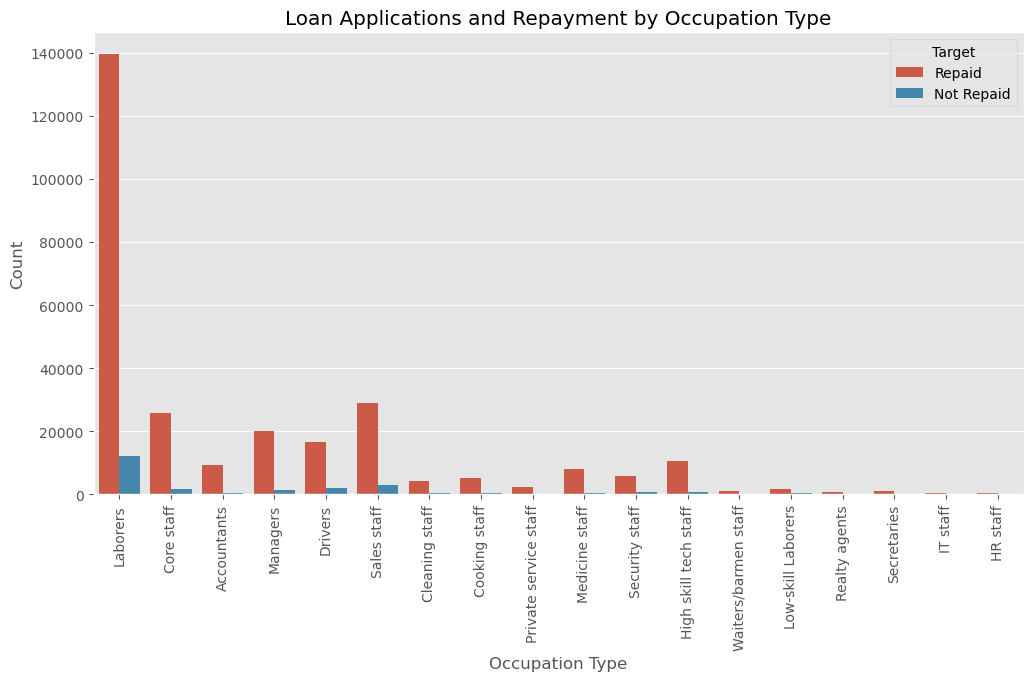

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bivariate analysis for Organization Type and Target (loan repayment status)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ORGANIZATION_TYPE', hue='TARGET')
plt.xticks(rotation=90)
plt.title('Loan Applications and Repayment by Organization Type')
plt.xlabel('Organization Type')
plt.ylabel('Count')
plt.legend(title='Target', labels=['Repaid', 'Not Repaid'])
plt.show()

# Bivariate analysis for Occupation Type and Target (loan repayment status)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='OCCUPATION_TYPE', hue='TARGET')
plt.xticks(rotation=90)
plt.title('Loan Applications and Repayment by Occupation Type')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.legend(title='Target', labels=['Repaid', 'Not Repaid'])
plt.show()


In [119]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming 'df' contains the necessary columns: ORGANIZATION_TYPE, OCCUPATION_TYPE, and TARGET

# Create traces for organization type
trace1 = go.Bar(
    y=df['ORGANIZATION_TYPE'].value_counts().index,
    x=df['ORGANIZATION_TYPE'].value_counts().values,
    orientation='h',
    marker=dict(color='#f975ae'),
    name='Organization Type'
)

# Create traces for occupation type
trace2 = go.Bar(
    y=df['OCCUPATION_TYPE'].value_counts().index,
    x=df['OCCUPATION_TYPE'].value_counts().values,
    orientation='h',
    marker=dict(color='#f975ae'),
    name='Occupation Type'
)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Applicants Organization Type', 'Applicants Occupation Type'))

# Add traces to subplots
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

fig.update_layout(height=600, showlegend=False, margin=dict(l=150))
fig.show()


In [ ]:
labarors-151.577k
sales staff-32.102k
business entity type3-123.366k

In [120]:
# Considering 'AMT_INCOME_TOTAL' and 'AMT_CREDIT' as numerical columns
correlation = df[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr()
print(correlation)


                  AMT_INCOME_TOTAL  AMT_CREDIT
AMT_INCOME_TOTAL          1.000000    0.424499
AMT_CREDIT                0.424499    1.000000


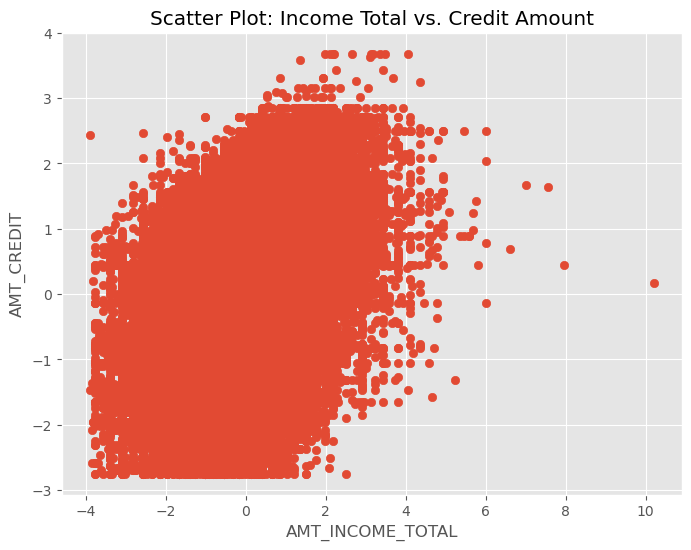

In [123]:
plt.figure(figsize=(8, 6))
plt.scatter(df['AMT_INCOME_TOTAL'], df['AMT_CREDIT'])
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('Scatter Plot: Income Total vs. Credit Amount')
plt.show()

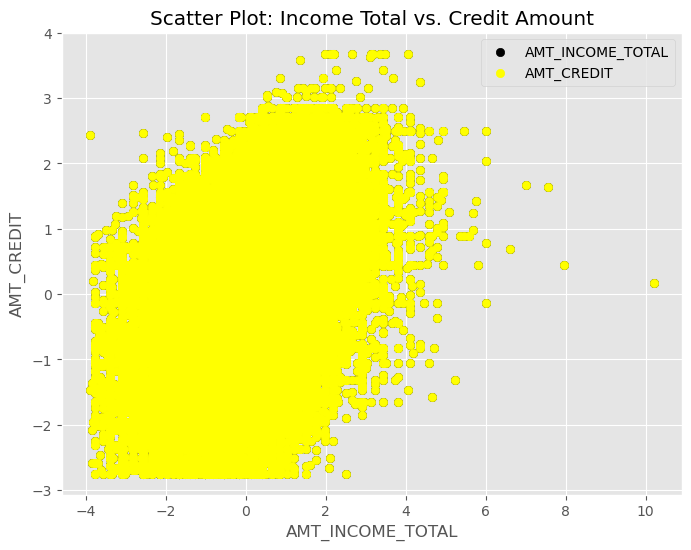

In [127]:
plt.figure(figsize=(8, 6))

# Scatter plot for AMT_INCOME_TOTAL
plt.scatter(df['AMT_INCOME_TOTAL'], df['AMT_CREDIT'], c='black', label='AMT_INCOME_TOTAL')

# Scatter plot for AMT_CREDIT
plt.scatter(df['AMT_INCOME_TOTAL'], df['AMT_CREDIT'], c='yellow', label='AMT_CREDIT')

plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('Scatter Plot: Income Total vs. Credit Amount')
plt.legend()
plt.show()


#### Numerical vs. Categorical:
Box Plot:

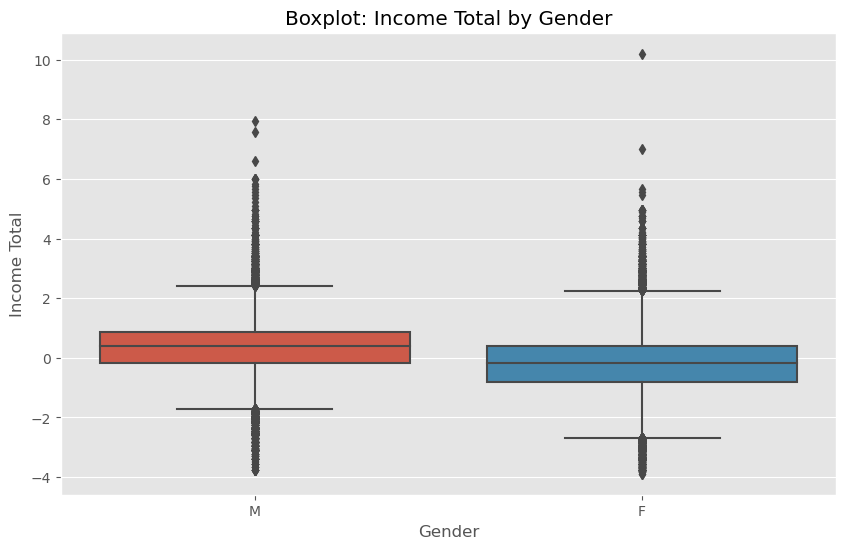

In [124]:
sns.boxplot(data=df, x='CODE_GENDER', y='AMT_INCOME_TOTAL')
plt.xlabel('Gender')
plt.ylabel('Income Total')
plt.title('Boxplot: Income Total by Gender')
plt.show()


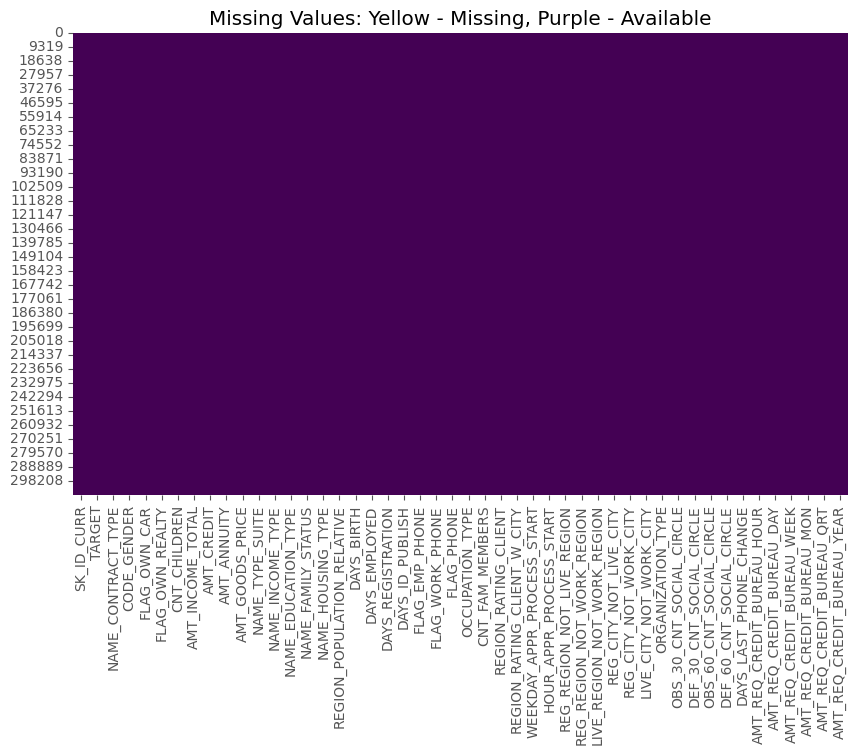

In [128]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values: Yellow - Missing, Purple - Available')
plt.show()


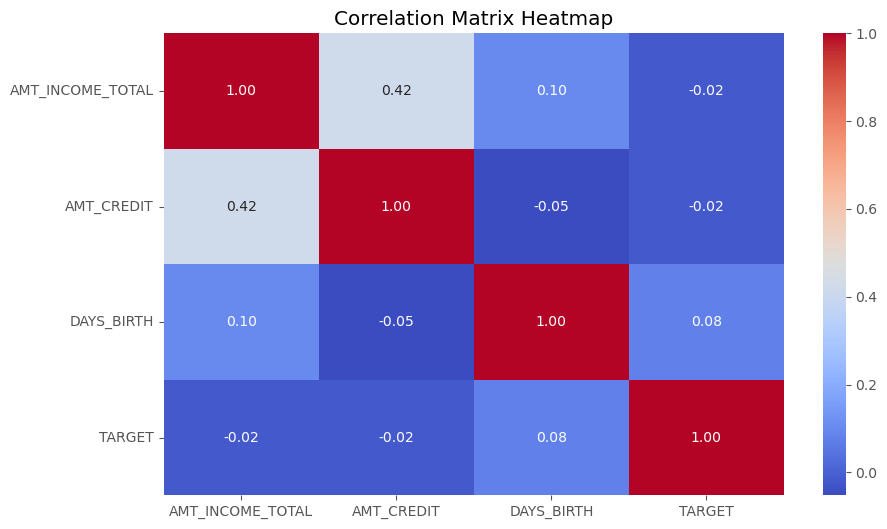

In [129]:
# Correlation Matrix heatmap
corr_matrix = df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'TARGET']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

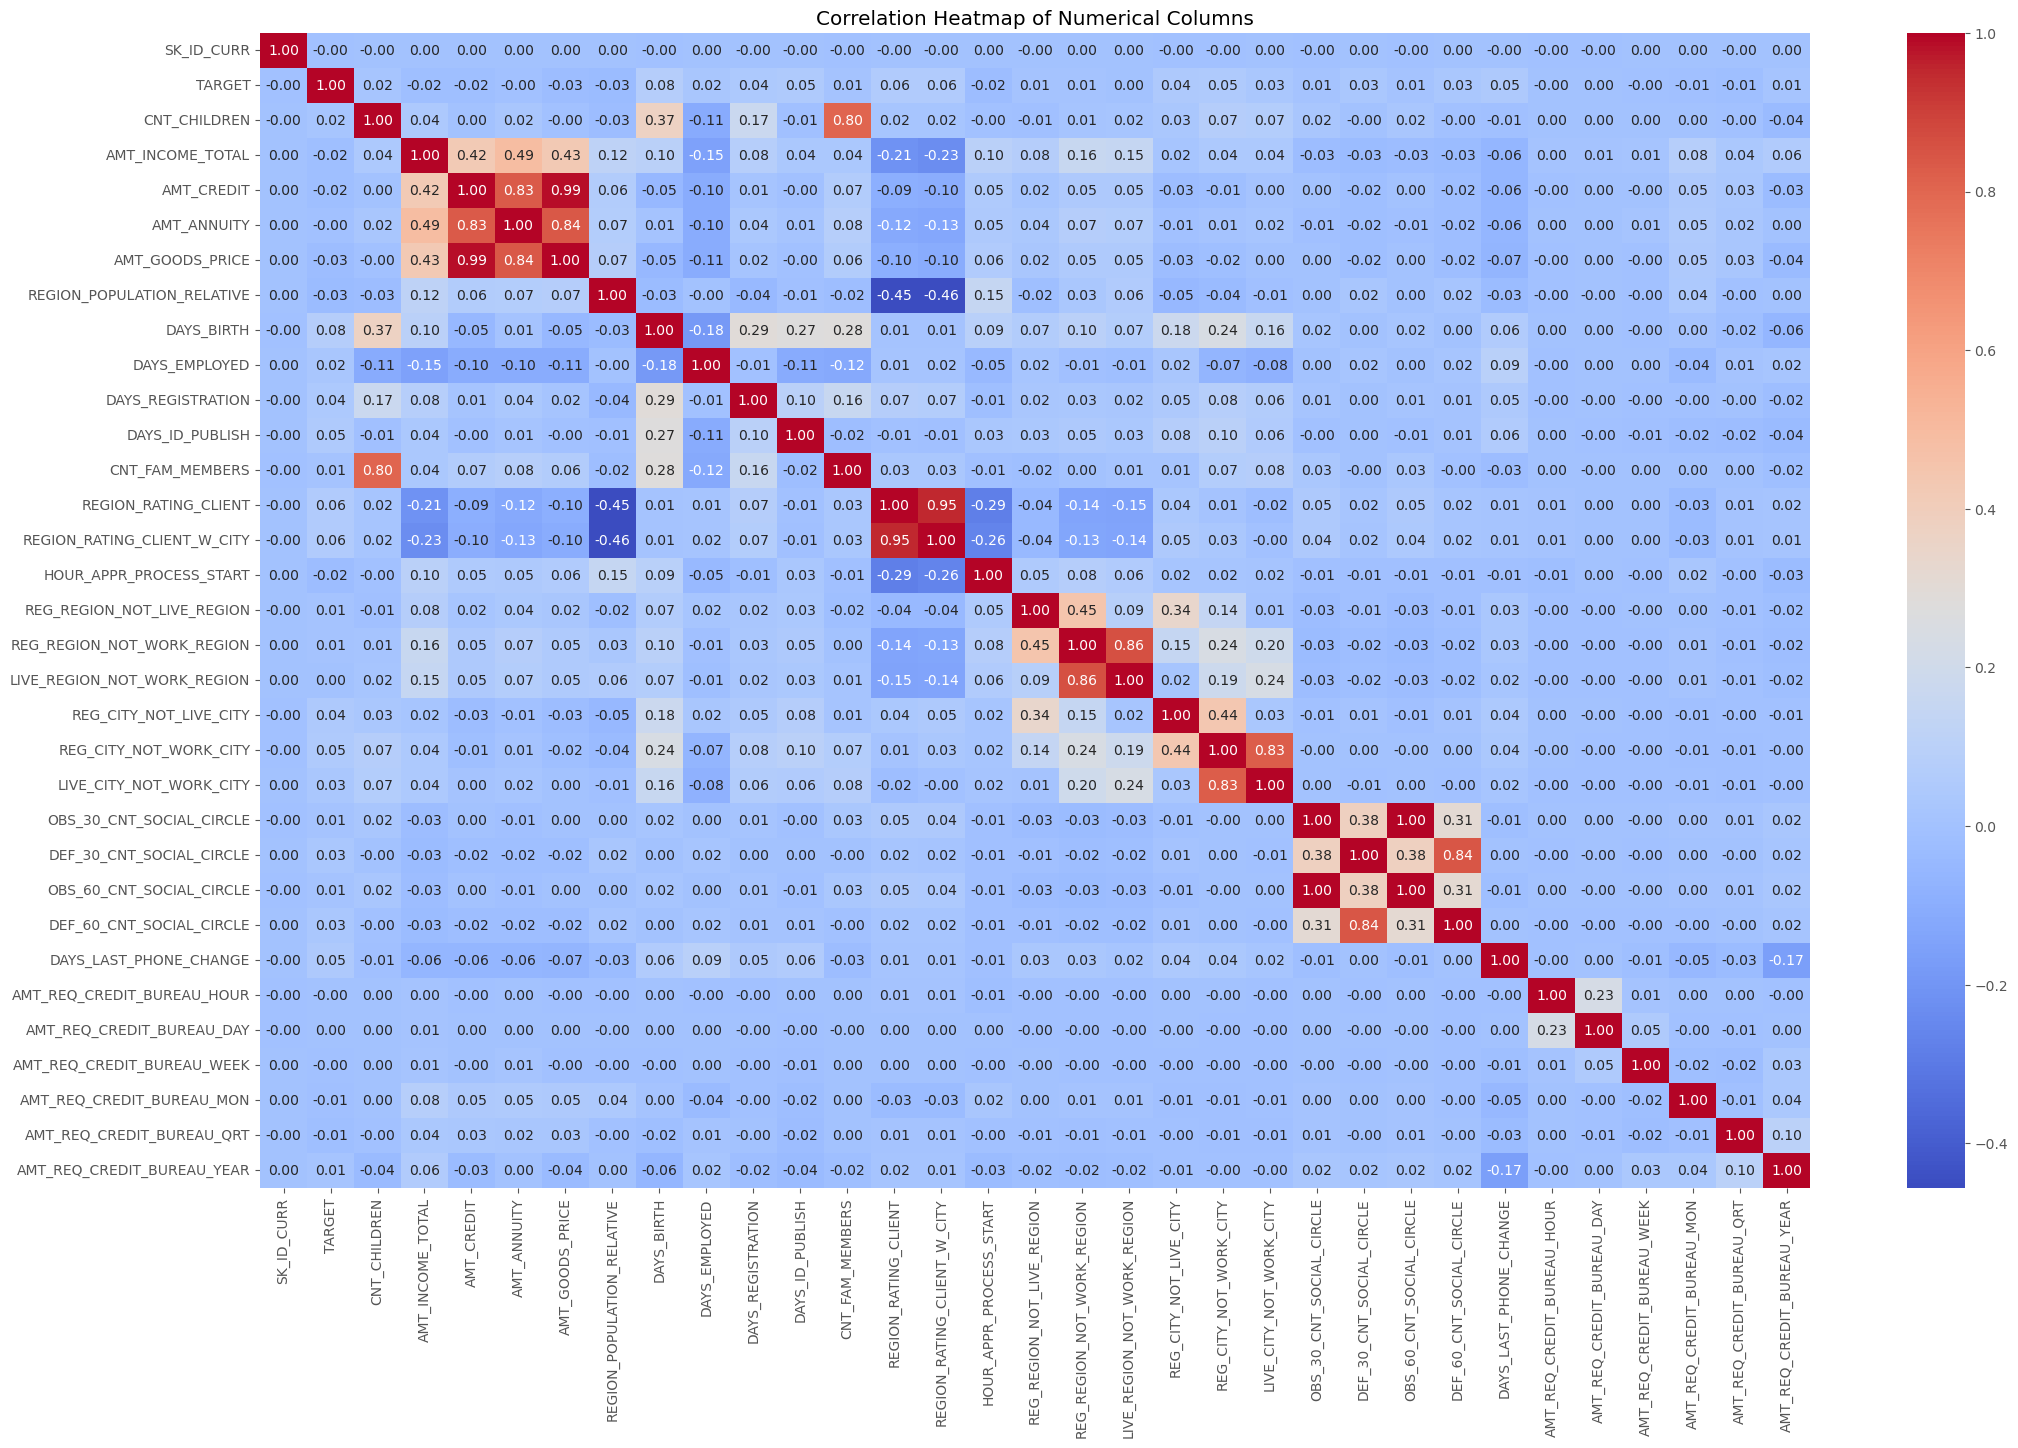

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your dataset with numerical columns
plt.figure(figsize=(25, 15))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()
